<center> <font color='black'> <b>Trabajo tres</b> </font> </center>

<center> <font color='black'> <b>Sistemas de recomendación</b> </font> </center>
<center> <font color='black'> <b>Juan David Garcia Zapata</b> </font> </center>
<center> <font color='black'> <b>Katerin Gómez Castrillón </b> </font> </center>
<center> <font color='black'> <b>Juan Diego Espinosa Hernandez</b> </font> </center>
<center> <font color='black'> <b>Juan Esteban Restrepo Jaramillo</b> </font> </center>
<center> <font color='black'> <b>Grupo 1</b> </font> </center>


<center> <font color='black'> <b>Introducción</b> </font> </center>


En la era digital actual, caracterizada por una abundante oferta de contenidos audiovisuales, los sistemas de recomendación se han convertido en una herramienta fundamental para la industria cinematográfica. Estos sistemas, que se basan en algoritmos complejos y técnicas de aprendizaje automático, analizan los patrones de visualización, las preferencias de los usuarios y las características de los contenidos, con el objetivo de personalizar la experiencia de entretenimiento. Su principal finalidad es sugerir películas, series y documentales que probablemente sean del agrado del espectador, facilitando así el descubrimiento de contenidos relevantes en un amplio abanico de opciones.

El presente trabajo se centra en explorar las reglas de asociación como método para construir recomendaciones más precisas y pertinentes en el ámbito cinematográfico. Esta técnica, particularmente útil para identificar relaciones interesantes entre grandes conjuntos de datos, permite detectar patrones de co-ocurrencia entre películas revelando conexiones que podrían no ser evidentes a primera vista. A través de este análisis, se evaluarán las ventajas y limitaciones de este enfoque, y se discutirá cómo puede complementar otros métodos de recomendación existentes, con el fin de contribuir al desarrollo de sistemas más eficaces y personalizados que mejoren la experiencia del usuario y faciliten el descubrimiento de obras cinematográficas de valor.

In [4]:
# Librerias que vamos a utilizar en el desarrollo del presenten trabajo.

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

import pandas as pd

from mlxtend.frequent_patterns import apriori

from mlxtend.frequent_patterns import association_rules

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity

import io

from tabulate import tabulate

import missingno as msno

from collections import Counter

from wordcloud import WordCloud

import plotly.express as px

In [5]:
# Directorio de los datos.

import os

os.chdir("C:/Users/Asus/Desktop/Trabajo mineria")

<center> <font color='black'> <b>Punto uno: Generación de reglas de asociación</b> </font> </center>

**a. Realiza una exploración inicial del dataset.**

La base de datos proviene de  MovieLens, una plataforma de investigación creada por GroupLens Research de la Universidad de Minnesota. MovieLens emplea tecnología de filtrado colaborativo para generar recomendaciones de películas personalizadas basadas en las calificaciones de los usuarios. Además de su función como servicio de recomendación, la plataforma sirve como valioso recurso para investigadores que estudian tecnologías de personalización. Los datos recopilados ofrecen una oportunidad única para analizar preferencias cinematográficas y desarrollar sistemas de recomendación avanzados, lo que la convierte en una fuente ideal para nuestro estudio.

In [7]:
# Lectura de nuestro conjunto de datos.

# Lectura de la base de datos de entrenamiento.

data=pd.read_csv("movies_train.csv")

# Lectura de la base de datos de validación.

data1=pd.read_csv("movies_test_val.csv")

# Lectura de la base de datos de prueba.

data2=pd.read_csv("movies_test.csv")

En el desarrollo de modelos de aprendizaje automático, los datos se dividen en tres conjuntos fundamentales: entrenamiento, validación y prueba. El conjunto de entrenamientose  utiliza para ajustar los parámetros del modelo, permitiendo que este aprenda de los datos. El conjunto de validación se emplea durante el proceso de entrenamiento para afinar los hiperparámetros y evaluar el rendimiento intermedio, ayudando a prevenir el sobreajuste. El conjunto de prueba se reserva para evaluar de manera objetiva el rendimiento del modelo en datos no utilizados previamente, midiendo su capacidad de generalización.

**Características de la base de datos**

**user_id:** Identifica de manera única a cada usuario que ha proporcionado una calificación. Esta variable es fundamental para realizar análisis individuales y desarrollar sistemas de recomendación personalizados, ajustados a los intereses específicos de cada usuario.

**movie_id:** Identifica de manera única a cada película que ha sido calificada. Es esencial para estudiar las preferencias de los usuarios y para generar recomendaciones basadas en similitudes entre películas.

**movie_name:** Proporciona el título de la película, lo que facilita la interpretación de los análisis y permite crear visualizaciones más intuitivas y comprensibles.

A continuación, realizaremos la exploración de los tres conjuntos de datos: entrenamiento, validación y prueba. El objetivo de este análisis es comprender la estructura de los datos, identificar posibles patrones y garantizar que estén correctamente preparados para el desarrollo del modelo. Dado que estos conjuntos de datos vienen definidos previamente, es ideal revisar que no presenten anomalías o inconsistencias que puedan afectar el rendimiento del modelo a construir. Este ejercicio de exploración y depuración de los datos de entrada constituye un paso fundamental para asegurar la calidad y confiabilidad de los resultados del modelo.

**Exploración de la base de entrenamiento**

Realizamos la exploración de nuestra base de entrenamiento para revisar su composición, identificar tendencias clave y garantizar la integridad de los datos, asegurando que estén correctamente preparados.

In [9]:
# Dimensión de la base de entrenamiento.

print(data.shape)

(768536, 3)


El conjunto de datos de entrenamiento analizado consta de 768536 registros, distribuidos en 3 columnas de nuestra base datos de entrenamiento.

In [11]:
# Visualizando  las primeras filas.

data.head(n=5)

,user_id,movie_id,movie_name
0,1,1721,Titanic (1997)
1,1,1270,Back to the Future (1985)
2,1,2797,Big (1988)
3,1,48,Pocahontas (1995)
4,1,1961,Rain Man (1988)


Revisemos que nuestra base de datos no tenga datos faltantes.

In [12]:
faltantes = data.isna().sum()

resultados = pd.DataFrame({
    
    'Variable': faltantes.index,
    
    'Cantidad': faltantes.values
    
})

print(resultados)

sum(data.isna().sum())

     Variable  Cantidad
0     user_id         0
1    movie_id         0
2  movie_name         0


0

No se han encontrado datos faltantes en las variables **user_id**, **movie_id** y **movie_name**, ya que todas presentan registros completos. Esto asegura la calidad e integridad de los datos, lo que elimina la necesidad de técnicas de imputación o eliminación de registros, facilitando un análisis más eficiente y fiable en las siguientes fases del proyecto.

In [13]:
# Hago el conteo de columnas cuya fila sea igual a cero

cols = data[data == 0].count(axis=0)

# Reviso cuántas columnas tienen filas con valores en cero

cols[cols > 0]

Series([], dtype: int64)

El análisis muestra que no hay valores faltantes, con un recuento de ceros en cada variable, lo que asegura que los datos están completos.

In [14]:
# Información general del dataset

buffer = io.StringIO()

data.info(buf=buffer)

info = buffer.getvalue()

info_list = [line.split(maxsplit=3) for line in info.split('\n')[5:-3]]

print(tabulate(info_list, headers=["#", "Varible", "Cantidad no nulos", "Tipo"]))

  #  Varible       Cantidad no nulos  Tipo
---  ----------  -------------------  ----------------
  0  user_id                  768536  non-null  int64
  1  movie_id                 768536  non-null  int64
  2  movie_name               768536  non-null  object


Para garantizar que las variables reflejen correctamente su naturaleza, es necesario ajustar los tipos de datos según la información general de la base de datos. Esto incluye convertir variables categóricas, como **user_id** y **movie_id**, a tipos de datos adecuados como categorica. Además, dado que nuestra variable de interés **movie_name** a cadena de texto , para asegurar que los análisis posteriores puedan manejarla correctamente. Estos ajustes mejorarán la precisión y eficiencia en el manejo de los datos y garantizarán que las operaciones de análisis con coherencia.

In [16]:
data['movie_name'] = data['movie_name'].astype(str)

data['movie_id'] = data['movie_id'].astype('category')

data['user_id'] = data['user_id'].astype('category')

In [17]:
buffer = io.StringIO()

data.info(buf=buffer)

info = buffer.getvalue()

info_list = [line.split(maxsplit=3) for line in info.split('\n')[5:-3]]

print(tabulate(info_list, headers=["#", "Varible", "Cantidad no nulos", "Tipo"]))

  #  Varible       Cantidad no nulos  Tipo
---  ----------  -------------------  ------------------
  0  user_id                  768536  non-null  category
  1  movie_id                 768536  non-null  category
  2  movie_name               768536  non-null  object


Grafiquemos las 10 películas más frecuentes en nuestra base de datos. Este análisis exploratorio es fundamental para identificar patrones y tendencias clave en las películas más populares antes de avanzar hacia nuestro objetivo principal de análisis de asociación. De esta manera, podemos detectar relaciones preliminares que nos permitirán formular hipótesis más precisas y optimizar el enfoque del análisis posterior.

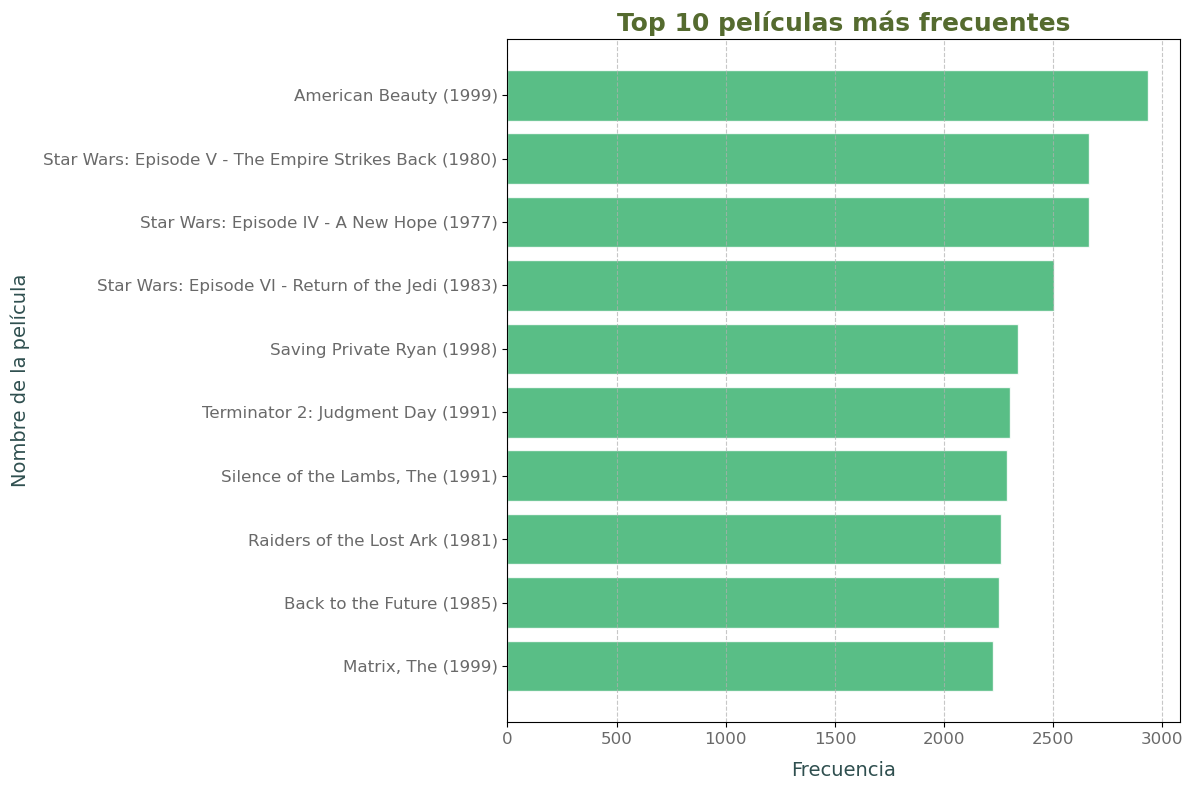

In [18]:
plt.figure(figsize=(12, 8))


movie_counts = data['movie_name'].value_counts().head(10)

plt.barh(
    
    movie_counts.index,  # Los nombres de las películas
    
    movie_counts.values,  # La frecuencia de cada película
    
    color='mediumseagreen', 
    
    edgecolor='white', 
    
    alpha=0.85
)

plt.xlabel('Frecuencia', fontsize=14, labelpad=10, color='darkslategray')

plt.ylabel('Nombre de la película', fontsize=14, labelpad=10, color='darkslategray')

plt.title('Top 10 películas más frecuentes', fontsize=18, fontweight='bold', color='darkolivegreen')

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.xticks(fontsize=12, color='dimgray')

plt.yticks(fontsize=12, color='dimgray')

plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()


Se refleja una clara tendencia hacia títulos de alto impacto en la cultura popular, especialmente de los años 80 y 90. American Beauty (1999) lidera con la mayor cantidad de registros, seguido por varias entregas de la saga Star Wars, como Episode V - The Empire Strikes Back (1980) y Episode IV - A New Hope (1977), lo que resalta la relevancia histórica y duradera de esta franquicia en las preferencias del público. Películas de acción y ciencia ficción, como Terminator 2: Judgment Day (1991) y The Matrix (1999), también ocupan posiciones destacadas, lo que sugiere una inclinación hacia géneros populares en ese periodo. La presencia de títulos como Saving Private Ryan (1998) y Silence of the Lambs (1991) indica una diversidad de gustos, que incluye tanto dramas bélicos como thrillers psicológicos. 

Analicemos la distribución de los usuarios en nuestra base de datos. Este paso nos ayuda a entender mejor la estructura y segmentación de los usuarios.

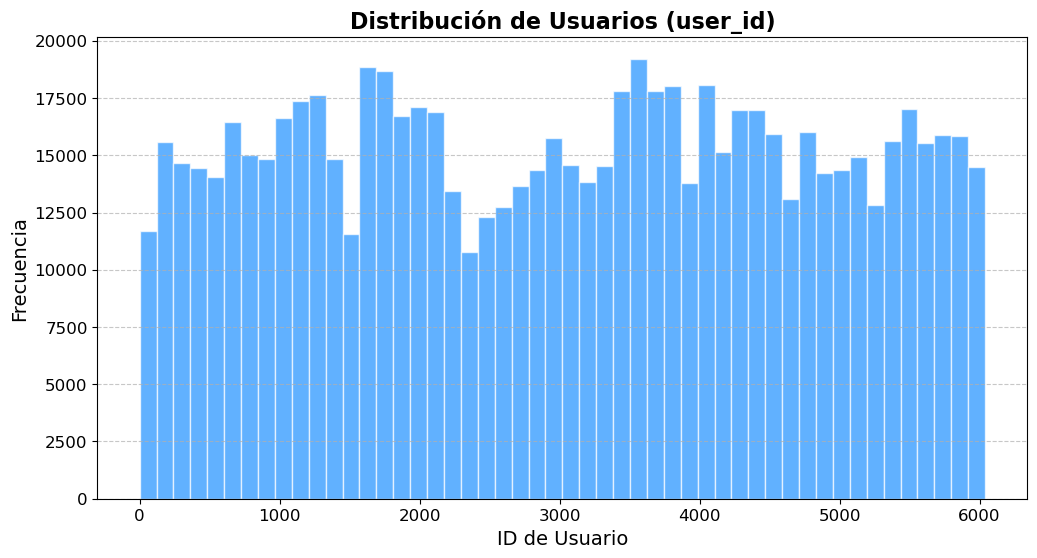

In [20]:
plt.figure(figsize=(12, 6))

plt.hist(data['user_id'], bins=50, color='dodgerblue', edgecolor='white', alpha=0.7)

plt.title('Distribución de Usuarios (user_id)', fontsize=16, fontweight='bold')

plt.xlabel('ID de Usuario', fontsize=14)

plt.ylabel('Frecuencia', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.show()

El gráfico nos muestra una distribución uniforme de los **user_id**, con diferencias en la cantidad de películas vistas por usuario, indicando que algunos usuarios tienen más interacciones que otros.

**Análisis base de datos de validación**

Procedemos a analizar nuestra base de validación para verificar la calidad de los datos y su adecuación.

In [23]:
# Dimensión de la base.

print(data1.shape)

(2500, 3)


La base de validación tiene un total de 2500 registros distribuidos en 3 columnas, que representan las variables **user_id**, **movie_id** y **movie_name**.

In [24]:
# Visualizando  las primeras filas.

data1.head(n=5)

,user_id,movie_id,movie_name
0,13,2,Jumanji (1995)
1,13,2105,Tron (1982)
2,13,527,Schindler's List (1993)
3,13,1429,Jackie Chan's First Strike (1996)
4,13,1587,Conan the Barbarian (1982)


Una gráfica de datos faltantes es ideal para identificar patrones o áreas problemáticas en la base de datos, incluso si los datos provienen de una fuente confiable. Esta visualización permite detectar campos con muchas ausencias y tomar decisiones sobre cómo manejarlos antes de continuar

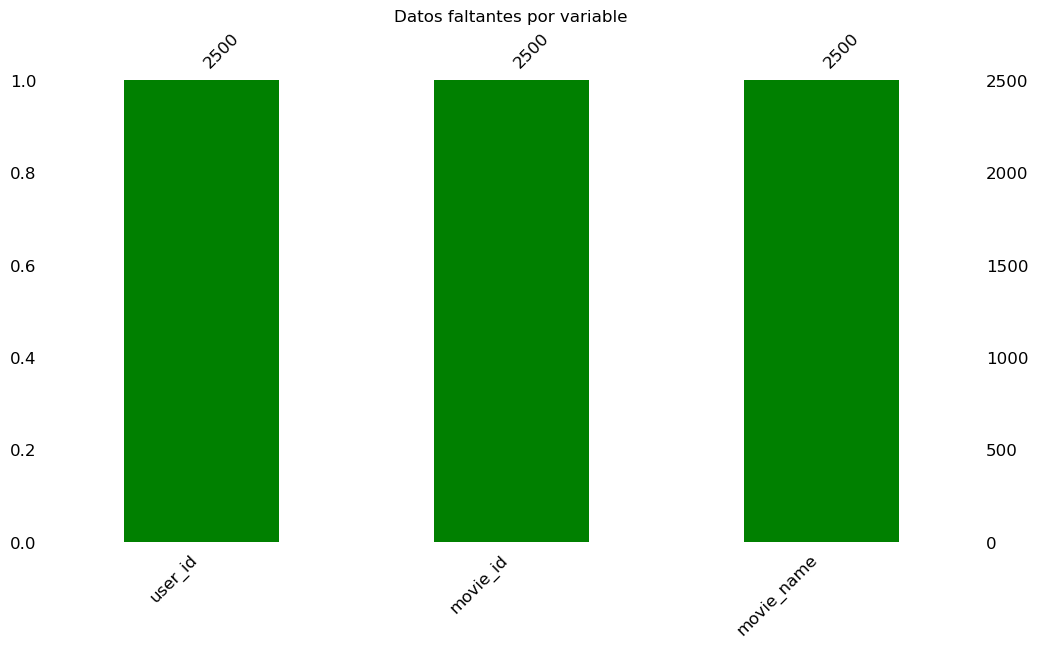

In [25]:
ax = msno.bar(data1, figsize=(12, 6), sort="ascending", fontsize=12, color='green')

plt.title('Datos faltantes por variable')

plt.show()

Nuestra base de datos de validación está en óptimas condiciones, ya que no presenta datos faltantes en ninguna de las variables, lo que garantiza su integridad y permite proceder al análisis sin necesidad de correcciones adicionales.

In [26]:
data1['movie_name'] = data1['movie_name'].astype(str)

data1['movie_id'] = data1['movie_id'].astype('category')

data1['user_id'] = data1['user_id'].astype('category')

En este escenario exploratorio, una nube de palabras es una herramienta útil para analizar los títulos de las películas. Al visualizar de manera clara las palabras más frecuentes, permite identificar términos recurrentes y patrones clave en los títulos. Esto facilita una comprensión preliminar del contenido y las tendencias antes de proceder con un análisis más detallado.

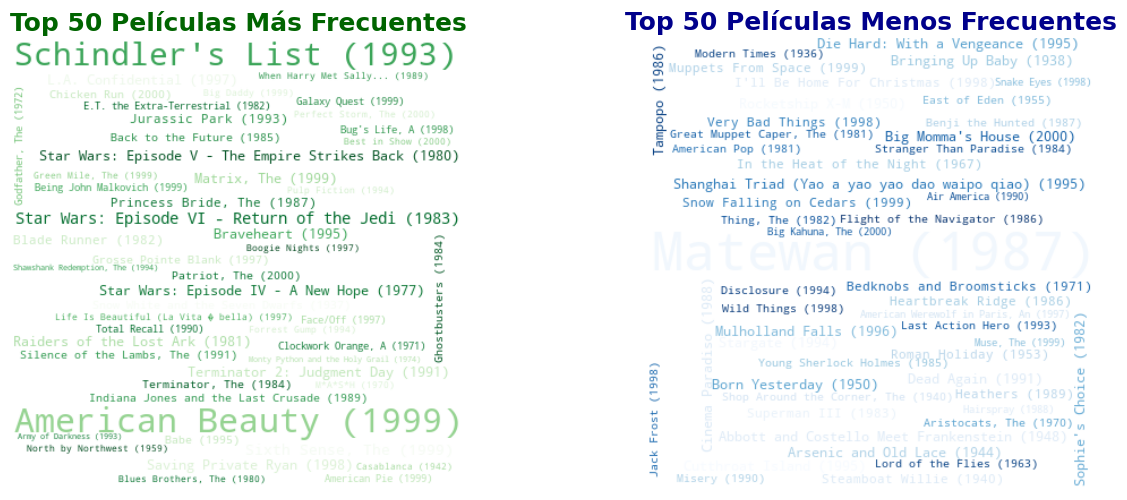

In [27]:
# Contar la frecuencia de los nombres de películas

movie_counts_real = data1['movie_name'].value_counts()

# Obtener las 50 películas más frecuentes y las 10 menos frecuentes

top_50_movies_real = movie_counts_real.head(50)

bottom_50_movies_real = movie_counts_real.tail(50)

# Crear una figura con dos subplots para las nubes de palabras

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7), dpi=100)

# Nube de palabras para las 50 películas más frecuentes

wordcloud_top_real = WordCloud(

    width=400,

    height=400,

    background_color='white',

    colormap='Greens',  # Colores agradables

    max_font_size=100

).generate_from_frequencies(top_50_movies_real)

ax1.imshow(wordcloud_top_real, interpolation='bilinear')

ax1.set_title('Top 50 Películas Más Frecuentes', fontsize=18, fontweight='bold', color='darkgreen')

ax1.axis('off')

# Nube de palabras para las 50 películas menos frecuentes

wordcloud_bottom_real = WordCloud(

    width=400,

    height=400,

    background_color='white',

    colormap='Blues',  # Diferente esquema de color

    max_font_size=100

).generate_from_frequencies(bottom_50_movies_real)


ax2.imshow(wordcloud_bottom_real, interpolation='bilinear')

ax2.set_title('Top 50 Películas Menos Frecuentes', fontsize=18, fontweight='bold', color='darkblue')

ax2.axis('off')

# Ajustar diseño

plt.subplots_adjust(wspace=0.4)

plt.show()

El gráfico muestra la comparación de las 50 películas más frecuentes y las 50 películas menos frecuentes dentro de nuestro conjunto de datos de validación. En las películas más frecuentes destacan títulos como American Beauty (1999) y Star Wars: Episode V - The Empire Strikes Back (1980), lo que indica una clara preferencia por estas películas en la muestra. En contraste, las películas menos frecuentes, como The Aristocats (1970) y The Thing (1982), tienen una menor representación en el conjunto de validación, lo que podría reflejar menos interés o menor exposición entre los usuarios. Estos resultados ofrecen una perspectiva útil sobre las tendencias de visualización en el conjunto de validación.

**Revisamos la base de datos de prueba**

Revisamos rápidamente los datos de prueba, ya que previamente habíamos examinado tanto los datos de prueba como los de validación, lo que nos permite enfocarnos en los aspectos más relevantes y evitar redundancias en el análisis.

In [29]:
# Dimensión de la base.

print(data2.shape)

(65442, 3)


El conjunto de datos de prueba analizado consta de 768536 registros, distribuidos en las 3 variables anterirmente descriptas.

In [30]:
# Visualizando  las primeras filas.

data.head(n=5)

,user_id,movie_id,movie_name
0,1,1721,Titanic (1997)
1,1,1270,Back to the Future (1985)
2,1,2797,Big (1988)
3,1,48,Pocahontas (1995)
4,1,1961,Rain Man (1988)


Procedemos a verificar los datos faltantes en nuestra base de datos de prueba.

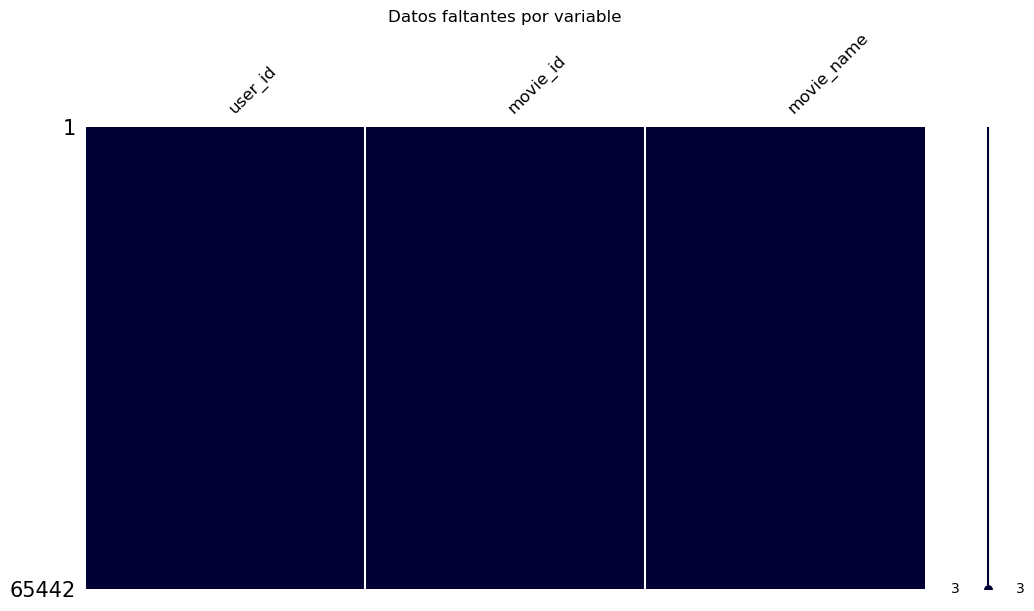

In [31]:
ax = msno.matrix(data2,figsize=(12, 6), fontsize=12, color=[0,0,0.2])

plt.title('Datos faltantes por variable')

plt.show()

No se evidencian datos faltantes.

**b. ¿Cuál fue el soporte y la confianza mínima que estableciste para la generación de reglas? Justifica tu elección.**

El soporte y la confianza mínima son parámetros clave en la generación de reglas de asociación dentro de la minería de datos. El soporte mínimo se refiere a la frecuencia con la que un conjunto de elementos aparece en el conjunto de datos, lo cual es crucial para asegurar que las reglas generadas se basen en patrones relevantes. Al establecer un soporte mínimo adecuado, se filtran combinaciones que, aunque puedan existir, ocurren con tan poca frecuencia que no resultan significativas para el análisis. De este modo, se logra un equilibrio entre encontrar patrones útiles sin incluir asociaciones triviales o excepcionales.

Por otro lado, la confianza mínima mide la probabilidad de que una consecuencia ocurra dado un conjunto de condiciones previas. Este parámetro garantiza que las reglas generadas no solo sean frecuentes, sino también consistentes y predecibles. Un nivel de confianza adecuado ayuda a evitar reglas poco fiables, mientras que un valor demasiado alto podría descartar relaciones interesantes pero menos evidentes. En conjunto, la correcta configuración de estos dos parámetros permite extraer asociaciones significativas que aporten valor real al análisis sin sobrecargar el proceso con información irrelevante.

**Nota**: En este caso, los valores de soporte y confianza fueron seleccionados con base en la conveniencia, es decir, ajustamos estos parámetros para asegurar que los códigos pudieran ejecutarse correctamente puede variar para cada algoritmo, debido a limitaciones computacionales. Aunque los valores elegidos permitieron la ejecución, el tiempo de procesamiento fue considerable.

In [33]:
# Crear la matriz usuario-película donde 1 indica que el usuario vio la película y 0 en caso contrario.

user_movie_matrix = data.pivot_table(index='user_id', columns='movie_name', aggfunc='size', fill_value=0)

# Calcular el soporte de cada película (la proporción de usuarios que vieron cada película).

movie_support = user_movie_matrix.sum(axis=0) / len(user_movie_matrix)

# Obtener los 5 valores de soporte más altos y más bajos.

top_5_support = movie_support.nlargest(5)

bottom_5_support = movie_support.nsmallest(5)

# Mostrar los resultados

print("5 películas con mayor soporte:\n", top_5_support)

print("\n5 películas con menor soporte:\n", bottom_5_support)

5 películas con mayor soporte:
 movie_name
American Beauty (1999)                                   0.529699
Star Wars: Episode V - The Empire Strikes Back (1980)    0.481134
Star Wars: Episode IV - A New Hope (1977)                0.480953
Star Wars: Episode VI - Return of the Jedi (1983)        0.452067
Saving Private Ryan (1998)                               0.422459
dtype: float64

5 películas con menor soporte:
 movie_name
1-900 (1994)              0.000181
24-hour Woman (1998)      0.000181
Aiqing wansui (1994)      0.000181
Alley Cats, The (1968)    0.000181
American Strays (1996)    0.000181
dtype: float64


Observamos que las películas más populares tienen soportes cercanos al 50%, mientras que las películas menos populares tienen soportes extremadamente bajos, del orden de 0.00018. Considerando que queremos identificar patrones significativos sin excluir demasiadas combinaciones, un soporte mínimo adecuado debe excluir los conjuntos raros, pero no debe ser tan alto como para eliminar combinaciones potencialmente útiles.

Proponemos un soporte mínimo de 0.1 (10%), lo cual garantiza que solo se consideren combinaciones de películas vistas por al menos el 10% de los usuarios. Este umbral es suficientemente bajo como para captar asociaciones valiosas, pero excluye combinaciones que solo ocurren en un número insignificante de transacciones, lo que mejora la eficiencia del análisis sin perder patrones relevantes.

La confianza es otra métrica crucial, ya que mide la probabilidad condicional de que un ítem esté presente en una transacción dado que otro ítem ya lo está. En el caso de las reglas de asociación (A → B), la confianza representa cuántas veces la película B es vista por un usuario que ya ha visto la película A. Un umbral de confianza muy bajo puede generar reglas poco significativas, mientras que un umbral muy alto puede ser demasiado restrictivo y eliminar reglas útiles. Por lo tanto, es fundamental elegir un valor de confianza que permita capturar asociaciones frecuentes sin generar reglas triviales o poco informativas.
Sugerimos una confianza mínima de 0.4, lo que significa que consideraremos reglas donde, al menos en el 40% de los casos, la visualización de una película A está asociada con la visualización de una película B. Este valor es lo suficientemente bajo para permitir la detección de relaciones útiles, pero suficientemente alto para evitar asociaciones débiles o irrelevantes.

**c. ¿Cuántas reglas de asociación obtuviste y cuáles consideras más relevantes? Explica por qué.**

**Nota importante:** Es importante tener en cuenta que al ejecutar algunos fragmentos de código, especialmente aquellos que involucran grandes volúmenes de datos o algoritmos complejos como Apriori, el tiempo de procesamiento puede ser considerablemente largo. Esto se debe a la cantidad de cálculos y combinaciones que el sistema debe generar. 

In [39]:
from mlxtend.preprocessing import TransactionEncoder

# Agrupar las transacciones por número de factura y convertir cada elemento a cadena.

transactions = data.groupby('user_id')['movie_name'].apply(lambda x: [str(i) for i in x]).tolist()

# Preprocesar datos para el algoritmo Apriori y FP-Growth.

te = TransactionEncoder()

te_ary = te.fit(transactions).transform(transactions)

df = pd.DataFrame(te_ary, columns=te.columns_)

df.head()

,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Regla de asociación**

**Algoritmo Apriori**

El algoritmo apriori es una técnica para descubrir reglas de asociación en bases de datos transaccionales. Su principal objetivo es identificar conjuntos de ítems que aparecen frecuentemente juntos. El algoritmo se basa en la propiedad de anti-monotonía, que establece que si un conjunto de ítems no es frecuente, entonces ningún subconjunto más grande que lo contenga lo será. Apriori opera en dos fases: primero, genera todos los conjuntos de ítems frecuentes a partir de los datos; luego, utiliza estos conjuntos para derivar reglas de asociación que relacionan la aparición conjunta de ciertos elementos. Aunque es sencillo de implementar, puede ser ineficiente cuando se trabaja con grandes bases de datos, ya que genera una cantidad significativa de combinaciones posibles, lo que implica un alto costo computacional.

In [ ]:
# from mlxtend.frequent_patterns import apriori, association_rules

## Encontrar ítems frecuentes con Apriori.

# frequent_itemsets_apriori = apriori(df, min_support=0.1, use_colnames=True)

#print(frequent_itemsets_apriori)

## Generar reglas de asociación con Apriori.

# rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

# print(rules_apriori)

**Nota**: Establecimos un soporte de 0.1. Sin embargo, en el caso del algoritmo Apriori, este valor puede ajustarse. En esta ocasión, al utilizar un soporte de 0.1, no obtuvimos resultados debido a la falta de memoria RAM disponible, lo que se debe al alto costo computacional que implica el procesamiento con el algoritmo Apriori.

Adoptamos un ajuste del soporte a 0.2 que es esencial debido a las limitaciones de memoria RAM y al alto costo computacional asociado con el algoritmo Apriori. Este incremento permitió optimizar los recursos disponibles y asegurar la correcta ejecución del código, evitando así fallos durante el procesamiento y asegurando resultados confiables.

In [40]:
from mlxtend.frequent_patterns import apriori, association_rules

# Encontrar ítems frecuentes con Apriori.

frequent_itemsets_apriori = apriori(df, min_support=0.2, use_colnames=True)

frequent_itemsets_apriori

# Generar reglas de asociación con Apriori.

rules_apriori = association_rules(frequent_itemsets_apriori, metric="lift", min_threshold=1)

rules_apriori

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Star Wars: Episode IV - A New Hope (1977)),(2001: A Space Odyssey (1968)),0.480953,0.259072,0.204911,0.426051,1.644527,0.080309,1.290930,0.755081
1,(2001: A Space Odyssey (1968)),(Star Wars: Episode IV - A New Hope (1977)),0.259072,0.480953,0.204911,0.790941,1.644527,0.080309,2.482774,0.528962
2,(Star Wars: Episode V - The Empire Strikes Bac...,(2001: A Space Odyssey (1968)),0.481134,0.259072,0.201841,0.419512,1.619288,0.077193,1.276389,0.737077
3,(2001: A Space Odyssey (1968)),(Star Wars: Episode V - The Empire Strikes Bac...,0.259072,0.481134,0.201841,0.779094,1.619288,0.077193,2.348811,0.516170
4,(Alien (1979)),(Aliens (1986)),0.319372,0.283986,0.219895,0.688525,2.424499,0.129198,2.298781,0.863237
...,...,...,...,...,...,...,...,...,...,...
1423,(Star Wars: Episode VI - Return of the Jedi (1...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.258169,0.296443,0.205091,0.794406,2.679788,0.128559,3.422061,0.844986
1424,(Terminator 2: Judgment Day (1991)),(Star Wars: Episode V - The Empire Strikes Bac...,0.415960,0.240116,0.205091,0.493056,2.053410,0.105213,1.498950,0.878373
1425,(Star Wars: Episode V - The Empire Strikes Bac...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.481134,0.217007,0.205091,0.426266,1.964301,0.100682,1.364733,0.946126
1426,"(Terminator, The (1984))","(Terminator 2: Judgment Day (1991), Star Wars:...",0.337064,0.244087,0.205091,0.608463,2.492807,0.122818,1.930628,0.903324


Al aplicar el algoritmo Apriori al análisis de películas, generamos 1,428 reglas de asociación. 

**Ventajas**

**Simplicidad:** Es fácil de entender e implementar, lo que lo convierte en una herramienta accesible para el análisis de reglas de asociación.
Ampliamente utilizado: Es uno de los algoritmos más conocidos y probados en el campo de la minería de datos, lo que facilita encontrar soluciones y optimizaciones.

**Generación de reglas de asociación interpretables:** Produce reglas de asociación que son fáciles de interpretar por analistas de datos y especialistas en negocios, lo que facilita la toma de decisiones.

**Flexibilidad:** Puede adaptarse para trabajar con diferentes tipos de datos, incluidas transacciones de ventas, encuestas y análisis de redes sociales.
Desventajas del algoritmo apriori:

**Ineficiencia con grandes conjuntos de datos:** Cuando se trabaja con bases de datos grandes, Apriori puede ser muy lento debido a la gran cantidad de combinaciones posibles que se generan, lo que aumenta el costo computacional.
Generación de demasiadas reglas: Puede producir una cantidad excesiva de reglas de asociación, muchas de las cuales no son útiles o relevantes, lo que requiere una post-filtración.

**Dependencia de umbrales:** La calidad del resultado depende de los valores seleccionados para el soporte mínimo y la confianza mínima, lo que puede requerir ajustes manuales.

**Requiere múltiples pasadas por la base de datos:** Esto aumenta el tiempo de procesamiento y el uso de memoria, lo que lo hace menos eficiente comparado con otros algoritmos optimizados, como FP-Growth.

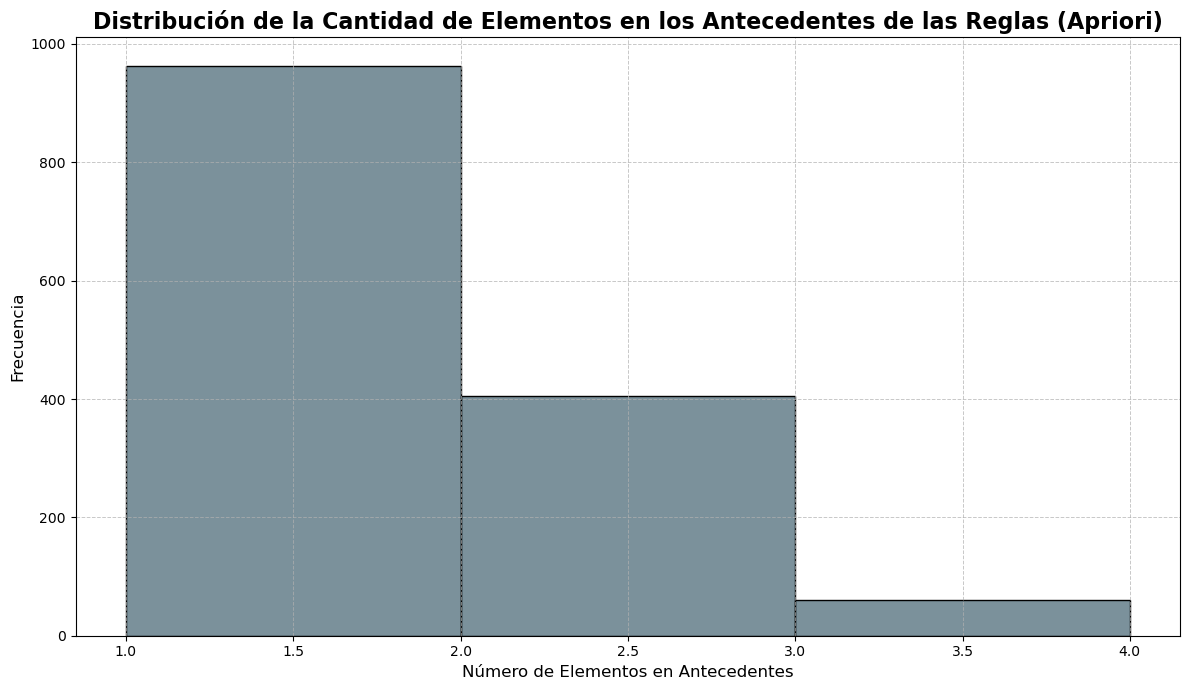

In [44]:
# Contar la cantidad de elementos en los antecedentes de cada regla.

rules_apriori['num_antecedents'] = rules_apriori['antecedents'].apply(len)

# Crear un gráfico de frecuencias de la cantidad de elementos en los antecedentes.

plt.figure(figsize=(12, 7))

sns.histplot(rules_apriori['num_antecedents'], 
             
             bins=range(1, rules_apriori['num_antecedents'].max() + 2), 
             
             kde=False, 
             
             color='#4F6D7A', 
             
             edgecolor='black')

# Configuración del gráfico

plt.title('Distribución de la Cantidad de Elementos en los Antecedentes de las Reglas (Apriori)', fontsize=16, fontweight='bold')

plt.xlabel('Número de Elementos en Antecedentes', fontsize=12)

plt.ylabel('Frecuencia', fontsize=12)

# Mejorar el estilo de la cuadrícula

plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

plt.tight_layout()

plt.show()


En la gráfica se observa que la mayoría de las reglas tienen uno o dos elementos en sus antecedentes, con una frecuencia superior a 900 para los antecedentes con un solo elemento y alrededor de 400 para aquellos con dos. A medida que aumenta la cantidad de elementos en los antecedentes, la frecuencia disminuye significativamente, siendo muy baja cuando hay tres o cuatro elementos en los antecedentes. Esto sugiere que las reglas más frecuentes se generan con pocos elementos en los antecedentes.

**Algoritmo FP-Growth**

El algoritmo FP-Growth es una técnica avanzada para la minería de patrones frecuentes y generación de reglas de asociación en grandes bases de datos transaccionales. Este algoritmo es reconocido por superar limitaciones de métodos previos, como Apriori, en términos de eficiencia y escalabilidad.

**Nota:** Se utilizará un soporte mínimo de 0.2 con el fin de optimizar el costo computacional. Inicialmente, se contempló emplear un soporte de 0.1 para capturar un mayor número de asociaciones; sin embargo, dicho valor genera un volumen excesivo de reglas de asociación, lo que incrementa significativamente el tiempo de procesamiento durante la evaluación del modelo. Al ajustar el soporte a 0.2, se busca reducir la cantidad de reglas generadas, mejorando así la eficiencia computacional del proceso.

In [45]:
from mlxtend.frequent_patterns import fpgrowth

# Encontrar ítems frecuentes con FP-Growth.

frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.2, use_colnames=True)

frequent_itemsets_fpgrowth

# Generar reglas de asociación con FP-Growth.

rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="lift", min_threshold=1)

rules_fpgrowth

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.481134,0.480953,0.378047,0.785741,1.633716,0.146644,2.422521,0.747589
1,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.480953,0.481134,0.378047,0.786036,1.633716,0.146644,2.425017,0.747329
2,(American Beauty (1999)),(Star Wars: Episode IV - A New Hope (1977)),0.529699,0.480953,0.271710,0.512952,1.066531,0.016949,1.065699,0.132640
3,(Star Wars: Episode IV - A New Hope (1977)),(American Beauty (1999)),0.480953,0.529699,0.271710,0.564940,1.066531,0.016949,1.081004,0.120184
4,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.275320,0.480953,0.222062,0.806557,1.676997,0.089645,2.683208,0.557069
...,...,...,...,...,...,...,...,...,...,...
1423,(2001: A Space Odyssey (1968)),(Star Wars: Episode IV - A New Hope (1977)),0.259072,0.480953,0.204911,0.790941,1.644527,0.080309,2.482774,0.528962
1424,(Star Wars: Episode V - The Empire Strikes Bac...,(2001: A Space Odyssey (1968)),0.481134,0.259072,0.201841,0.419512,1.619288,0.077193,1.276389,0.737077
1425,(2001: A Space Odyssey (1968)),(Star Wars: Episode V - The Empire Strikes Bac...,0.259072,0.481134,0.201841,0.779094,1.619288,0.077193,2.348811,0.516170
1426,(Star Wars: Episode V - The Empire Strikes Bac...,(Lethal Weapon (1987)),0.481134,0.254378,0.202203,0.420263,1.652118,0.079813,1.286138,0.760729


Al aplicar el algoritmo FP-Growth al análisis de películas, generamos 1,428 reglas de asociación. 

**Ventajas**

**Eficiencia computacional:** Elimina la generación de candidatos: A diferencia de Apriori, FP-Growth no genera todas las combinaciones posibles de ítems, lo que disminuye significativamente el tiempo de procesamiento, sobre todo en conjuntos de datos grandes.

**Escalabilidad:** Optimización de grandes volúmenes de datos: Comprime la base de datos en un árbol de patrones frecuentes (FP-Tree), lo que reduce el espacio requerido y permite realizar el análisis sin múltiples escaneos de la base de datos original.
Reducción del uso de memoria:

**Estructura compacta:** El FP-Tree agrupa eficientemente transacciones comunes, minimizando el uso de memoria en comparación con algoritmos que deben manejar grandes cantidades de datos sin compresión.
Descomposición eficiente:

**Segmentación en subproblemas manejables:** El algoritmo descompone el problema original en subproblemas más pequeños y manejables, lo que facilita la detección de patrones frecuentes de manera eficiente.

**Desventajas**

**Alto consumo de memoria inicial:** Construcción del FP-Tree: La creación del FP-Tree puede requerir gran cantidad de memoria, especialmente en bases de datos con un alto número de ítems únicos o transacciones poco homogéneas.
Complejidad de implementación:

**Estructura sofisticada** Aunque es eficiente, la implementación y comprensión del FP-Tree puede ser más compleja en comparación con algoritmos más sencillos, lo que puede suponer un reto en su adopción práctica.
Limitaciones con datos dispersos:

**Menor eficiencia en bases de datos dispersas:** En bases de datos donde las transacciones no comparten ítems comunes, el FP-Tree pierde su ventaja de compresión y su eficiencia puede verse comprometida.
Sensibilidad a cambios en los datos:

**Requiere reconstrucción ante cambios:** Si los datos se modifican con frecuencia, es necesario reconstruir el FP-Tree desde cero, lo que puede resultar costoso en términos de tiempo y recursos computacionales.

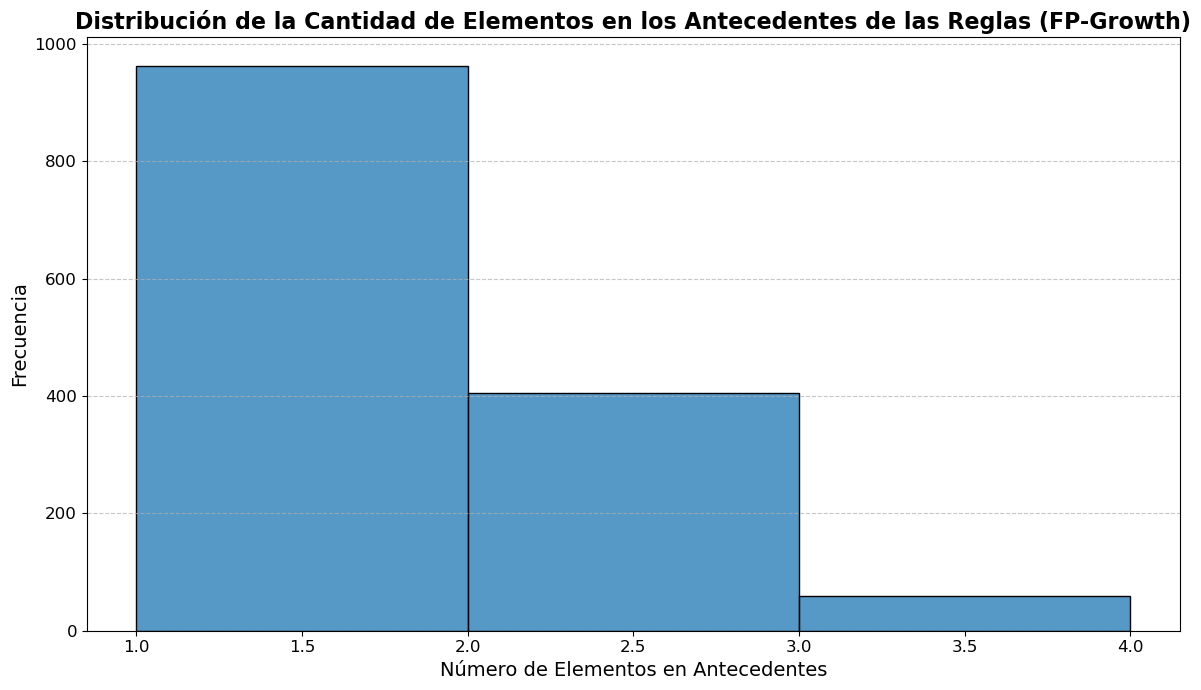

In [48]:
# Contar la cantidad de elementos en los antecedentes de cada regla.

rules_fpgrowth['num_antecedents'] = rules_fpgrowth['antecedents'].apply(len)

plt.figure(figsize=(12, 7))

sns.histplot(rules_fpgrowth['num_antecedents'], 
             
             bins=range(1, rules_fpgrowth['num_antecedents'].max() + 2), 
             
             kde=False, color='#1f77b4', edgecolor='black')


plt.title('Distribución de la Cantidad de Elementos en los Antecedentes de las Reglas (FP-Growth)', fontsize=16, fontweight='bold')

plt.xlabel('Número de Elementos en Antecedentes', fontsize=14)

plt.ylabel('Frecuencia', fontsize=14)

plt.xticks(fontsize=12)

plt.yticks(fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()


Se observa que la mayoría de las reglas tienen un solo antecedente, con una frecuencia cercana a las 1000, lo que sugiere que las asociaciones más comunes tienden a involucrar un único ítem previo. A medida que aumenta el número de elementos en los antecedentes, la frecuencia disminuye significativamente, con reglas de dos antecedentes representando una frecuencia de alrededor de 400, y reglas con tres y cuatro elementos siendo mucho menos frecuentes. Esta tendencia refleja que las reglas generadas suelen ser más simples, es decir, con antecedentes compuestos por pocos elementos, lo cual es una característica común en el análisis de reglas de asociación, donde las reglas más complejas suelen aparecer con menor frecuencia debido a la naturaleza combinatoria de los conjuntos de ítems.

En el análisis de reglas de asociación llevado a cabo con los algoritmos Apriori y FP-Growth, se generaron **1428 reglas** en ambas reglas de asociación cada una. Las más relevantes son aquellas con altos valores de **lift** y **confidence**, ya que estas métricas permiten evaluar la fortaleza y confiabilidad de las reglas. Un elevado **lift** indica que la ocurrencia conjunta de los ítems, en este caso películas, supera lo que se esperaría por azar, lo que sugiere una relación significativa entre ellas. Por otro lado, un alto **confidence** refleja la frecuencia con la que el consecuente de una regla ocurre cuando los antecedentes están presentes, lo que confirma la validez de la asociación entre los ítems. Estas reglas proporcionan un entendimiento más claro de las relaciones entre las películas y las preferencias de los usuarios en el conjunto de datos.

Es posible filtrar las reglas de asociación utilizando solo aquellas que cumplan con un umbral mínimo de confianza y lift. Esta práctica permite enfocarse en las reglas más sólidas y relevantes, garantizando que las relaciones descubiertas no sean solo frecuentes, sino también estadísticamente significativas. El umbral de confianza asegura que las reglas sean fiables, mientras que el lift ayuda a identificar asociaciones que ocurren más frecuentemente de lo que sería esperable por azar. Si bien este filtrado es opcional, puede mejorar la calidad del análisis al reducir el ruido y destacar patrones más útiles.

In [49]:
rules_apriori['antecedent_len'] = rules_apriori['antecedents'].apply(lambda x: len(x))

rules_apriori['consequent_len'] = rules_apriori['consequents'].apply(lambda x: len(x))

rules_fpgrowth['antecedent_len'] = rules_fpgrowth['antecedents'].apply(lambda x: len(x))

rules_fpgrowth['consequent_len'] = rules_fpgrowth['consequents'].apply(lambda x: len(x))

Para determinar cuáles reglas de asociación consideramos más relevantes, utilizaremos la métrica de lift, estableciendo un umbral mínimo de 1.3. 

In [50]:
# Definir umbrales para lift y confianza.

lift_threshold = 1.3  

confidence_threshold = 0.4 

# Filtrar reglas con lift y confianza superiores a los umbrales.

rules_apriori_filtered = rules_apriori[(rules_apriori['lift'] >= lift_threshold) &
                                       
                                       (rules_apriori['confidence'] >= confidence_threshold)]

rules_fpgrowth_filtered = rules_fpgrowth[(rules_fpgrowth['lift'] >= lift_threshold) &
                                         
                                         (rules_fpgrowth['confidence'] >= confidence_threshold)]

In [51]:
rules_apriori_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_antecedents,antecedent_len,consequent_len
0,(Star Wars: Episode IV - A New Hope (1977)),(2001: A Space Odyssey (1968)),0.480953,0.259072,0.204911,0.426051,1.644527,0.080309,1.290930,0.755081,1,1,1
1,(2001: A Space Odyssey (1968)),(Star Wars: Episode IV - A New Hope (1977)),0.259072,0.480953,0.204911,0.790941,1.644527,0.080309,2.482774,0.528962,1,1,1
2,(Star Wars: Episode V - The Empire Strikes Bac...,(2001: A Space Odyssey (1968)),0.481134,0.259072,0.201841,0.419512,1.619288,0.077193,1.276389,0.737077,1,1,1
3,(2001: A Space Odyssey (1968)),(Star Wars: Episode V - The Empire Strikes Bac...,0.259072,0.481134,0.201841,0.779094,1.619288,0.077193,2.348811,0.516170,1,1,1
4,(Alien (1979)),(Aliens (1986)),0.319372,0.283986,0.219895,0.688525,2.424499,0.129198,2.298781,0.863237,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,(Star Wars: Episode VI - Return of the Jedi (1...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.258169,0.296443,0.205091,0.794406,2.679788,0.128559,3.422061,0.844986,2,2,2
1424,(Terminator 2: Judgment Day (1991)),(Star Wars: Episode V - The Empire Strikes Bac...,0.415960,0.240116,0.205091,0.493056,2.053410,0.105213,1.498950,0.878373,1,1,3
1425,(Star Wars: Episode V - The Empire Strikes Bac...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.481134,0.217007,0.205091,0.426266,1.964301,0.100682,1.364733,0.946126,1,1,3
1426,"(Terminator, The (1984))","(Terminator 2: Judgment Day (1991), Star Wars:...",0.337064,0.244087,0.205091,0.608463,2.492807,0.122818,1.930628,0.903324,1,1,3


In [52]:
rules_fpgrowth_filtered

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_antecedents,antecedent_len,consequent_len
0,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.481134,0.480953,0.378047,0.785741,1.633716,0.146644,2.422521,0.747589,1,1,1
1,(Star Wars: Episode IV - A New Hope (1977)),(Star Wars: Episode V - The Empire Strikes Bac...,0.480953,0.481134,0.378047,0.786036,1.633716,0.146644,2.425017,0.747329,1,1,1
4,(Star Wars: Episode V - The Empire Strikes Bac...,(Star Wars: Episode IV - A New Hope (1977)),0.275320,0.480953,0.222062,0.806557,1.676997,0.089645,2.683208,0.557069,2,2,1
6,"(American Beauty (1999), Star Wars: Episode IV...",(Star Wars: Episode V - The Empire Strikes Bac...,0.271710,0.481134,0.222062,0.817276,1.698646,0.091333,2.839613,0.564741,2,2,1
7,(Star Wars: Episode V - The Empire Strikes Bac...,"(American Beauty (1999), Star Wars: Episode IV...",0.481134,0.271710,0.222062,0.461538,1.698646,0.091333,1.352539,0.792682,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,(2001: A Space Odyssey (1968)),(Star Wars: Episode IV - A New Hope (1977)),0.259072,0.480953,0.204911,0.790941,1.644527,0.080309,2.482774,0.528962,1,1,1
1424,(Star Wars: Episode V - The Empire Strikes Bac...,(2001: A Space Odyssey (1968)),0.481134,0.259072,0.201841,0.419512,1.619288,0.077193,1.276389,0.737077,1,1,1
1425,(2001: A Space Odyssey (1968)),(Star Wars: Episode V - The Empire Strikes Bac...,0.259072,0.481134,0.201841,0.779094,1.619288,0.077193,2.348811,0.516170,1,1,1
1426,(Star Wars: Episode V - The Empire Strikes Bac...,(Lethal Weapon (1987)),0.481134,0.254378,0.202203,0.420263,1.652118,0.079813,1.286138,0.760729,1,1,1


Después de aplicar los filtros establecidos, con un **lift** mínimo de 1.3 y una **confianza** de al menos 0.4, obtenemos un total de **1321 reglas de asociación** tanto para el algoritmo Apriori como para el FP-Growth. Estas reglas cumplen con los criterios definidos, asegurando que las asociaciones identificadas sean relevantes y representen relaciones significativas entre los ítems. Este conjunto reducido de reglas nos permitirá enfocar el análisis en las relaciones más sólidas y consistentes dentro del dataset, facilitando una toma de decisiones más eficiente.

<center> <font color='black'> <b>Punto dos: Sistema de recomendación basado en reglas de asociación.</b> </font> </center>

En esta etapa del trabajo, se desarrolla un sistema de recomendación utilizando dos enfoques principales: la popularidad y las reglas de asociación. Cada uno presenta ventajas y limitaciones, y el objetivo es determinar cuál ofrece mejores recomendaciones personalizadas para los usuarios en función de las películas que ya han visto. El primer enfoque, basado en la popularidad, se caracteriza por su simplicidad y eficacia. Parte de la premisa de que las películas que han sido vistas por un mayor número de usuarios tienen una mayor probabilidad de ser relevantes para otros. Este sistema resulta especialmente útil cuando se dispone de poca información sobre las preferencias individuales del usuario, lo que permite confiar en las tendencias generales del grupo.

El segundo enfoque, basado en las reglas de asociación, utiliza técnicas de minería de datos para identificar patrones recurrentes en las películas que los usuarios suelen ver en conjunto. A través de algoritmos como Apriori, se descubren relaciones entre distintos conjuntos de películas, lo que permite hacer recomendaciones más personalizadas en función de los hábitos previos de visualización de cada usuario.

Ambos enfoques se evalúan utilizando un conjunto de datos de validación, y las recomendaciones generadas se comparan con las películas que los usuarios realmente han visto. Para medir la efectividad del sistema de recomendación, se emplean métricas como la precisión y el *recall*, que permiten cuantificar el grado de acierto y la capacidad de recuperación de las recomendaciones propuestas.

**a. Implementa un modelo de recomendación basado en popularidad ¿cómo defines “popularidad” en este caso?**

El modelo de popularidad recomienda películas en función de la frecuencia con la que han sido vistas por los usuarios. Para su implementación, se utiliza el conjunto de datos de entrenamiento, donde se contabiliza el número de visualizaciones de cada película. Las películas con mayor número de visualizaciones se categorizan como populares y, por lo tanto, son recomendadas a los usuarios. Este enfoque se basa en la premisa de que las películas más vistas tienen una alta probabilidad de ser relevantes para una amplia audiencia, lo que lo convierte en una estrategia efectiva cuando no se dispone de información detallada sobre las preferencias individuales de cada usuario.

In [55]:
# Contar la popularidad de cada película (cuántas veces ha sido vista).

movie_popularity = data2['movie_id'].value_counts().reset_index()

movie_popularity.columns = ['movie_id', 'popularity']


movie_popularity_with_names = pd.merge(movie_popularity, data[['movie_id', 'movie_name']].drop_duplicates(), on='movie_id')

# Ordenar las películas por popularidad.

popular_movies_with_names = movie_popularity_with_names.sort_values(by='popularity', ascending=False)

# Mostrar las 5 películas más populares con sus nombres.

popular_movies_with_names[['movie_name', 'popularity']].head()

,movie_name,popularity
0,American Beauty (1999),259
1,Star Wars: Episode IV - A New Hope (1977),232
2,Saving Private Ryan (1998),208
3,Star Wars: Episode V - The Empire Strikes Back...,207
4,Raiders of the Lost Ark (1981),199


Las películas ordenadas por popularidad, basada en el número de visualizaciones. American Beauty (1999) encabeza la lista con 259 vistas, seguida de Star Wars: Episode IV - A New Hope (1977) con 232, y Saving Private Ryan (1998) con 208. También destacan Star Wars: Episode V - The Empire Strikes Back (1980) con 207 vistas y Raiders of the Lost Ark (1981) con 199. Estas películas, todas reconocidas y aclamadas, reflejan una preferencia por producciones clásicas y de gran impacto entre los usuarios, lo que las convierte en las principales recomendaciones según el modelo de popularidad.

**b. ¿Cómo implementaste el sistema de recomendación basado en las reglas de asociación?**

El sistema de recomendación se fundamenta en dos enfoques complementarios: reglas de asociación y popularidad de las películas. Para identificar patrones de comportamiento en los usuarios, se emplean los algoritmos Apriori y FP-Growth. Apriori permite detectar itemsets frecuentes, mientras que FP-Growth optimiza el procesamiento al manejar eficientemente grandes volúmenes de datos, reduciendo significativamente el tiempo de cómputo sin comprometer la precisión de las recomendaciones. Además, se integra la popularidad de las películas, lo que permite sugerir títulos que han sido vistos por un gran número de usuarios. Esta combinación de personalización basada en el historial de visualización del usuario, junto con la consideración de películas populares, ofrece un sistema robusto y eficiente que mejora significativamente la experiencia del usuario, proporcionando recomendaciones tanto personalizadas como de alto interés general.

In [57]:
def recommend(item, rules, n):
    
    item_set = {item}

    # Filtrar reglas cuyo antecedente contiene el ítem.
    
    rules_match = rules[rules['antecedents'].apply(lambda x: item_set.issubset(x))]

    # Excluir las reglas donde el ítem está en los consecuentes.
    
    rules_match = rules_match[~rules_match['consequents'].apply(lambda x: item in x)]

    # Verificar si las columnas necesarias existen.
    
    if 'lift' in rules_match.columns and 'confidence' in rules_match.columns:
        # Filtrar por lift y confianza si es necesario
        rules_match = rules_match[(rules_match['lift'] > 1) & (rules_match['confidence'] > 0.01)]

        # Obtener los ítems recomendados de las reglas seleccionadas.
        
        if not rules_match.empty:
            recommended_items = rules_match['consequents'].apply(lambda x: list(x)).explode().unique()
            return recommended_items[:n]

    return []

Por ejemplo, si un usuario ha visto *Indiana Jones and the Last Crusade* (1989), el sistema de recomendación analizará las preferencias de otros usuarios con gustos similares para identificar películas que comúnmente se ven en conjunto con ese título. De esta manera, la función de recomendación no solo sugiere películas relacionadas temáticamente o dentro del mismo género, sino que también considera patrones de visualización de usuarios con intereses afines, mejorando la precisión y relevancia de las sugerencias proporcionadas.

In [58]:
transaction_example = 'Indiana Jones and the Last Crusade (1989)'

recommendations_apriori = recommend(transaction_example, rules_apriori_filtered,n=10)

recommendations_fpgrowth = recommend(transaction_example, rules_fpgrowth_filtered,n=10)

print("Recomendaciones con Apriori:")

print(recommendations_apriori)

print("Recomendaciones con FP-Growth:")

print(recommendations_fpgrowth)

Recomendaciones con Apriori:
['Raiders of the Lost Ark (1981)'
 'Star Wars: Episode IV - A New Hope (1977)'
 'Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Star Wars: Episode VI - Return of the Jedi (1983)']
Recomendaciones con FP-Growth:
['Raiders of the Lost Ark (1981)'
 'Star Wars: Episode V - The Empire Strikes Back (1980)'
 'Star Wars: Episode IV - A New Hope (1977)'
 'Star Wars: Episode VI - Return of the Jedi (1983)']


Las recomendaciones generadas utilizando los algoritmos Apriori y FP-Growth presentan una notable coherencia, sugiriendo títulos clásicos y populares. En ambos casos, destacan películas como *Raiders of the Lost Ark* (1981) y varias de la saga *Star Wars*, lo que indica la fuerte asociación entre estos títulos en los hábitos de visualización de los usuarios. Aunque las recomendaciones en ambos enfoques son similares, FP-Growth ofrece una mayor eficiencia en el procesamiento, especialmente cuando se trabaja con grandes volúmenes de datos. Esto demuestra que ambos algoritmos son efectivos para identificar películas relevantes basadas en patrones de consumo, con ligeras diferencias en la forma en que exploran las asociaciones entre los títulos.

Para mejorar la calidad de las recomendaciones, se ordenaron las reglas de asociación generadas por ambos algoritmos en función de la métrica **lift**. Esta métrica nos permite identificar las reglas más fuertes, es decir, aquellas en las que la ocurrencia conjunta de los ítems es significativamente mayor de lo que se esperaría por azar. Al seleccionar las mejores reglas basadas en un **lift** elevado, aseguramos que las recomendaciones sean más relevantes y útiles para los usuarios, ya que reflejan asociaciones sólidas entre las películas. Este proceso optimiza la precisión del sistema de recomendación, proporcionando sugerencias que tienen una alta probabilidad de ser del interés del usuario.

In [59]:
# Ordenar reglas por lift (o por confianza si prefieres).

rules_apriori_filtered_sorted = rules_apriori_filtered.sort_values(by='lift', ascending=False)

# Seleccionar las mejores reglas.

top_n = 15

top_rules_apriori = rules_apriori_filtered_sorted.head(top_n)

In [60]:
rules_apriori.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_antecedents,antecedent_len,consequent_len
1423,(Star Wars: Episode VI - Return of the Jedi (1...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.258169,0.296443,0.205091,0.794406,2.679788,0.128559,3.422061,0.844986,2,2,2
1418,"(Terminator 2: Judgment Day (1991), Star Wars:...",(Star Wars: Episode VI - Return of the Jedi (1...,0.296443,0.258169,0.205091,0.691839,2.679788,0.128559,2.407284,0.890953,2,2,2
1409,"(Star Wars: Episode IV - A New Hope (1977), Te...","(Terminator 2: Judgment Day (1991), Star Wars:...",0.275501,0.296443,0.216285,0.785059,2.648259,0.134614,3.273254,0.859067,2,2,2
1404,"(Terminator 2: Judgment Day (1991), Star Wars:...","(Star Wars: Episode IV - A New Hope (1977), Te...",0.296443,0.275501,0.216285,0.729598,2.648259,0.134614,2.679341,0.884639,2,2,2
1421,(Star Wars: Episode V - The Empire Strikes Bac...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.284889,0.274598,0.205091,0.719899,2.621643,0.126861,2.589783,0.864984,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,(American Beauty (1999)),(Star Wars: Episode V - The Empire Strikes Bac...,0.529699,0.481134,0.275320,0.519768,1.080299,0.020465,1.080450,0.158048,1,1,1
86,(American Beauty (1999)),(Star Wars: Episode IV - A New Hope (1977)),0.529699,0.480953,0.271710,0.512952,1.066531,0.016949,1.065699,0.132640,1,1,1
87,(Star Wars: Episode IV - A New Hope (1977)),(American Beauty (1999)),0.480953,0.529699,0.271710,0.564940,1.066531,0.016949,1.081004,0.120184,1,1,1
90,(American Beauty (1999)),(Star Wars: Episode VI - Return of the Jedi (1...,0.529699,0.452067,0.251670,0.475119,1.050993,0.012211,1.043919,0.103165,1,1,1


Las reglas de asociación ordenadas por la métrica lift en el algoritmo apriori,  permite identificar las relaciones más fuertes entre películas. Por ejemplo, una de las reglas más destacadas tiene como antecedentes Star Wars: Episode VI - Return of the Jedi (1983) y Terminator 2: Judgment Day (1991), con un consecuente que incluye las mismas películas pero en orden inverso. Esta regla presenta un lift de 2.68, lo que indica que la probabilidad de que estas películas sean vistas juntas es casi tres veces mayor de lo que ocurriría por azar. Además, la regla tiene un confidence del 79.44%, lo que sugiere una alta probabilidad de que los usuarios que ven estas películas en conjunto repitan ese patrón. Estos valores, junto con otras métricas como leverage y conviction, respaldan la solidez de las reglas seleccionadas para ofrecer recomendaciones precisas y relevantes.

Ahora con el algoritmo FP-Growth

In [61]:
# Ordenar reglas por lift (o por confianza si prefieres).

rules_fpgrowth_sorted = rules_fpgrowth_filtered.sort_values(by='lift', ascending=False)

# Seleccionar las mejores reglas.

top_n = 5

top_rules_fpgrowth = rules_fpgrowth_sorted.head(top_n)

In [62]:
rules_fpgrowth.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,num_antecedents,antecedent_len,consequent_len
1093,(Star Wars: Episode VI - Return of the Jedi (1...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.258169,0.296443,0.205091,0.794406,2.679788,0.128559,3.422061,0.844986,2,2,2
1088,"(Terminator 2: Judgment Day (1991), Star Wars:...",(Star Wars: Episode VI - Return of the Jedi (1...,0.296443,0.258169,0.205091,0.691839,2.679788,0.128559,2.407284,0.890953,2,2,2
1146,"(Terminator 2: Judgment Day (1991), Star Wars:...","(Star Wars: Episode IV - A New Hope (1977), Te...",0.296443,0.275501,0.216285,0.729598,2.648259,0.134614,2.679341,0.884639,2,2,2
1151,"(Star Wars: Episode IV - A New Hope (1977), Te...","(Terminator 2: Judgment Day (1991), Star Wars:...",0.275501,0.296443,0.216285,0.785059,2.648259,0.134614,3.273254,0.859067,2,2,2
1091,(Star Wars: Episode V - The Empire Strikes Bac...,"(Terminator 2: Judgment Day (1991), Star Wars:...",0.284889,0.274598,0.205091,0.719899,2.621643,0.126861,2.589783,0.864984,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,(Star Wars: Episode V - The Empire Strikes Bac...,(American Beauty (1999)),0.481134,0.529699,0.275320,0.572233,1.080299,0.020465,1.099433,0.143255,1,1,1
3,(Star Wars: Episode IV - A New Hope (1977)),(American Beauty (1999)),0.480953,0.529699,0.271710,0.564940,1.066531,0.016949,1.081004,0.120184,1,1,1
2,(American Beauty (1999)),(Star Wars: Episode IV - A New Hope (1977)),0.529699,0.480953,0.271710,0.512952,1.066531,0.016949,1.065699,0.132640,1,1,1
302,(American Beauty (1999)),(Star Wars: Episode VI - Return of the Jedi (1...,0.529699,0.452067,0.251670,0.475119,1.050993,0.012211,1.043919,0.103165,1,1,1


Las reglas de asociación generadas mediante el algoritmo FP-Growth, ordenadas por la métrica lift. Estas reglas revelan relaciones fuertes entre las películas, como en el caso de Star Wars: Episode VI - Return of the Jedi (1983) y Terminator 2: Judgment Day (1991), que aparecen tanto en los antecedentes como en los consecuentes con un lift de 2.68. Este valor indica que la probabilidad de que estas películas sean vistas en conjunto es más de dos veces mayor de lo que se esperaría por azar. Además, la confianza de 79.44% en una de las reglas sugiere una alta consistencia en las recomendaciones, mientras que las métricas de leverage y conviction también refuerzan la fiabilidad de las asociaciones. Estas reglas proporcionan una base sólida para hacer recomendaciones precisas, identificando patrones de visualización que son comunes entre los usuarios con gustos similares, lo que optimiza la personalización y la eficiencia del sistema de recomendación.

**c. ¿Cómo evalúas la efectividad de las recomendaciones generadas? ¿Qué métricas utilizaste?**

Para evaluar la efectividad del sistema de recomendación, se comparan las películas sugeridas con las que los usuarios realmente visualizaron en el conjunto de validación. Las métricas clave utilizadas en esta evaluación son la **precisión**, el **recall** y el **F1 Score**. La precisión mide el porcentaje de recomendaciones correctas en relación con el total de sugerencias realizadas, mientras que el recall cuantifica qué proporción de las películas que los usuarios vieron fueron correctamente recomendadas. El F1 Score, que combina ambos aspectos, proporciona una medida equilibrada entre precisión y recall, permitiendo una evaluación integral del sistema. Estas métricas ofrecen una visión clara del rendimiento del modelo y permiten ajustar y optimizar las recomendaciones para mejorar su relevancia y precisión.

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

def calculate_metrics(true_items, recommended_items):
    
    # Convertir a conjuntos para facilitar las operaciones.
    
    true_items = set(true_items)
    
    recommended_items = set(recommended_items)

    # Calcular precisión y recall.
    
    true_positives = len(true_items & recommended_items)
    
    precision = true_positives / len(recommended_items) if len(recommended_items) > 0 else 0
    
    recall = true_positives / len(true_items) if len(true_items) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [65]:
def validate_recommendations(test_data, val_data, rules, n=1):
    
    precisions = []
    
    recalls = []
    
    f1_scores = []

    # Iterar sobre cada usuario en el conjunto de prueba (data2).
    
    for user in test_data['user_id'].unique():
        
        # Obtener películas de prueba para el usuario.
        
        test_items = test_data[test_data['user_id'] == user]['movie_name'].tolist()

        # Obtener películas de validación para el usuario (data1).
        
        val_items = val_data[val_data['user_id'] == user]['movie_name'].tolist()

        # Generar recomendaciones para el usuario.
        
        recommendations = []
        
        for item in test_items:
            
            recommendations.extend(recommend(item=item, rules=rules, n=n))

        # Filtrar recomendaciones para evitar duplicados y limitar el número.
        
        recommendations = list(set(recommendations))[:n]

        # Calcular métricas.
        
        precision, recall, f1 = calculate_metrics(val_items, recommendations)
        
        precisions.append(precision)
        
        recalls.append(recall)
        
        f1_scores.append(f1)

    # Calcular el promedio de las métricas.
    
    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    
    avg_recall = sum(recalls) / len(recalls) if recalls else 0
    
    avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1


Las métricas para el sistema de recomendación basado en las reglas de asociación utilizando el algoritmo Apriori son las siguientes: 

In [66]:
avg_precision, avg_recall, avg_f1 = validate_recommendations(test_data=data2, val_data=data1, rules=rules_apriori_filtered, n=5)

print(f'Average Precision: {avg_precision:.2f}')

print(f'Average Recall: {avg_recall:.2f}')

print(f'Average F1 Score: {avg_f1:.2f}')

Average Precision: 0.02
Average Recall: 0.02
Average F1 Score: 0.02


Las métricas obtenidas para el sistema de recomendación basado en el algoritmo Apriori muestran un rendimiento promedio bajo, con una precisión media de 0.02, un recall medio de 0.02 y un F1 Score medio de 0.02. Estos valores indican que, en promedio, solo el 2% de las recomendaciones realizadas fueron correctas, y solo el 2% de las películas vistas por los usuarios fueron adecuadamente recomendadas. Este desempeño sugiere que el sistema puede necesitar ajustes adicionales, como el refinamiento de las reglas de asociación o la optimización de los parámetros, para mejorar la calidad de las recomendaciones y su relevancia para los usuarios.

Las métricas para el sistema de recomendación basado en las reglas de asociación utilizando el algoritmo FP-Growth son las siguientes: 

In [68]:
# Llamada a la función con las bases correctas.

avg_precision, avg_recall, avg_f1 = validate_recommendations(test_data=data2, val_data=data1, rules=rules_fpgrowth_filtered, n=5)

print(f'Average Precision: {avg_precision:.2f}')

print(f'Average Recall: {avg_recall:.2f}')

print(f'Average F1 Score: {avg_f1:.2f}')

Average Precision: 0.03
Average Recall: 0.03
Average F1 Score: 0.03


Las métricas obtenidas para el sistema de recomendación utilizando el algoritmo FP-Growth muestran un rendimiento similar al de Apriori, con una precisión promedio de 0.03, un recall promedio de 0.03 y un F1 Score promedio de 0.03. Estos resultados indican que, en promedio, solo el 3% de las recomendaciones fueron acertadas y el 3% de las películas vistas por los usuarios fueron correctamente recomendadas. 

Tanto el sistema de recomendación basado en el algoritmo Apriori como el implementado con FP-Growth presentan un desempeño limitado en su configuración actual. El modelo Apriori arrojó métricas de precisión, recall y F1 Score promedio de 0.02, lo que indica una baja efectividad en la identificación de recomendaciones relevantes. Por su parte, el modelo FP-Growth obtuvo valores ligeramente mejores, con una precisión, recall y F1 Score promedio de 0.03. A pesar de estas diferencias, ambos sistemas muestran que su capacidad para generar recomendaciones acertadas es limitada. Estos resultados sugieren la necesidad de realizar ajustes adicionales en los parámetros, optimizar las reglas de asociación o mejorar el procesamiento de los datos, con el fin de aumentar la precisión y relevancia de las recomendaciones ofrecidas a los usuarios.

<center> <font color='black'> <b>Punto Tres: Evolución hacia filtrado colaborativo</b> </font> </center>

**a. ¿Cuáles son las principales diferencias entre el enfoque basado en reglas de asociación y el filtrado colaborativo?**

Ambos enfoques, el basado en reglas de asociación y el filtrado colaborativo, son ampliamente utilizados en sistemas de recomendación, pero tienen objetivos y métodos distintos. El enfoque de **reglas de asociación** se centra en identificar patrones frecuentes entre distintos ítems dentro de un conjunto de datos. Este método emplea algoritmos como Apriori, FP-Growth y Eclat, los cuales descubren correlaciones entre productos o ítems en grandes bases de datos, identificando combinaciones recurrentes. Este enfoque es común en aplicaciones como el análisis de comportamiento de compra, marketing y estrategias de venta cruzada, ya que permite descubrir asociaciones entre productos sin considerar las preferencias individuales de los usuarios.

Por otro lado, el enfoque de **filtrado colaborativo** se basa en los comportamientos y preferencias de los usuarios para hacer recomendaciones. Este método funciona de dos maneras: filtrado colaborativo basado en usuarios, donde se recomiendan ítems a un usuario comparando su comportamiento con el de otros usuarios similares; y filtrado colaborativo basado en ítems, donde se sugieren ítems similares a los que el usuario ha interactuado previamente. Utiliza técnicas como la descomposición matricial y los vecinos más cercanos para predecir qué ítems podrían interesarle a un usuario. A diferencia del enfoque de reglas de asociación, el filtrado colaborativo prioriza las interacciones de los usuarios, lo que permite generar recomendaciones personalizadas y más alineadas con sus preferencias individuales.

**b. ¿Cómo implementaste el sistema de recomendación item-to-item? ¿Qué algoritmos o técnicas utilizaste?**

**Filtrado Colaborativo: ítems to ítems**

En el enfoque de filtrado colaborativo **item-to-item**, en lugar de analizar cada ítem de forma aislada, se toma en cuenta el historial completo de consumo de cada usuario. Esto implica revisar todos los ítems que un usuario ha consumido para identificar las similitudes entre los ítems y construir recomendaciones más contextualizadas y alineadas con los patrones de consumo. Para determinar estas similitudes, se emplean dos métricas clave: la **similitud de Jaccard**, que mide la proporción de usuarios que han consumido ambos ítems en comparación con el total de usuarios que ha consumido al menos uno de ellos; y la **similitud de coseno**, que evalúa la cercanía entre ítems a través de los vectores de interacciones, considerando el ángulo que forman en un espacio multidimensional. Ambas métricas permiten construir recomendaciones más precisas y ajustadas al comportamiento de los usuarios.

**Similitud de Jaccard**

**Ventajas**

Fácil interpretación: Al medir la proporción de usuarios que han consumido ambos ítems en relación con el total de usuarios que ha consumido al menos uno, es fácil entender y aplicar.

Útil para conjuntos dispersos: Funciona bien cuando se tiene un conjunto de datos disperso o con baja interacción, ya que considera solo la intersección de los ítems.

Rápida implementación: Es sencilla de implementar y requiere menos procesamiento en comparación con otras métricas.

**Desventajas**

No considera la frecuencia: No toma en cuenta cuántas veces un usuario ha interactuado con un ítem, lo que puede ser una limitación en ciertos escenarios.

Sesgo hacia ítems populares: Tiende a sobrevalorar la similitud entre ítems que han sido consumidos por un gran número de usuarios, lo que puede afectar la personalización.

Menor precisión en datos densos: En conjuntos de datos donde hay muchas interacciones entre los usuarios y los ítems, la similitud de Jaccard puede no capturar adecuadamente las diferencias más finas entre los ítems.

**Similitud de coseno**

**Ventajas**

Considera la frecuencia de interacciones: Mide la similitud entre ítems basándose en el número de interacciones, lo que puede ofrecer recomendaciones más precisas en términos de co-ocurrencia.

Adecuada para datos densos: Es particularmente útil en escenarios donde existen muchos datos de interacción, ya que puede capturar mejor la relación entre los ítems.

Escalabilidad: Funciona bien con grandes volúmenes de datos, ya que se basa en cálculos vectoriales que pueden ser optimizados.

**Desventaja**

Mayor complejidad computacional: Requiere más procesamiento y almacenamiento que la similitud de Jaccard, ya que trabaja con vectores y ángulos en espacios multidimensionales.

Sensibilidad a las interacciones esporádicas: Puede ser menos efectiva en conjuntos de datos muy dispersos, donde las interacciones entre los ítems son menos frecuentes.

Dificultad de interpretación: Al basarse en el ángulo entre vectores, la interpretación de los resultados puede ser menos intuitiva que con otras métricas.

**Pasos**

**Paso 1**: Crear la matriz de utilidad, que representa las interacciones entre los usuarios y los ítems, donde cada fila corresponde a un usuario y cada columna a un ítem, reflejando el historial de consumo o las preferencias de los usuarios.

In [74]:
# Crear la matriz de utilidad.

utility_matrix = data.pivot_table(index='user_id', columns='movie_name', values='movie_id', aggfunc='count', fill_value=0)

utility_matrix.head()

movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Paso 2**: Calcular la similitud entre ítems, utilizando métricas como la **Similitud de Jaccard** o la **Similitud de Coseno** para identificar qué ítems tienden a ser consumidos juntos o tienen patrones de interacción similares entre los usuarios.

**Similitud de coseno**

In [77]:
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

# Calcular la similitud entre ítems.

item_similarity = cosine_similarity(utility_matrix.T)

# Convertir a DataFrame.

item_similarity_df = pd.DataFrame(item_similarity, index=utility_matrix.columns, columns=utility_matrix.columns)

# Ver las similitudes.

item_similarity_df.head()

movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
movie_name,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.057831,0.040893,0.046886,0.047559,0.0,0.044741,0.165998,0.134316,0.061790,...,0.051333,0.060093,0.000000,0.045775,0.0,0.046625,0.026481,0.00000,0.062869,0.024531
'Night Mother (1986),0.057831,1.000000,0.054393,0.093547,0.126519,0.0,0.089267,0.142869,0.089328,0.099800,...,0.034139,0.111903,0.049029,0.121773,0.0,0.093026,0.070447,0.00000,0.000000,0.081574
'Til There Was You (1997),0.040893,0.054393,1.000000,0.073498,0.029821,0.0,0.100994,0.091840,0.113697,0.058116,...,0.000000,0.056520,0.000000,0.064580,0.0,0.043853,0.024907,0.00000,0.059131,0.046145
"'burbs, The (1989)",0.046886,0.093547,0.073498,1.000000,0.125369,0.0,0.151178,0.221130,0.149673,0.130094,...,0.083035,0.172809,0.026500,0.131635,0.0,0.050280,0.133267,0.00000,0.045198,0.079362
...And Justice for All (1979),0.047559,0.126519,0.029821,0.125369,1.000000,0.0,0.084830,0.188699,0.107744,0.209206,...,0.074868,0.166524,0.080640,0.100143,0.0,0.102003,0.106212,0.05376,0.000000,0.107334


**Similitud de Jaccard**

In [79]:
import pandas as pd

import numpy as np

from sklearn.metrics import pairwise_distances

def jaccard_similarity(matrix):
    
    # Convertir los datos de la matriz en formato binario (0 o 1).
    
    binary_matrix = (matrix > 0).astype(int).values
    
    # Calcular la similitud de Jaccard.
    
    # pairwise_distances con metric="jaccard" devuelve distancias, así que restamos de 1 para obtener similitudes.
    
    item_similarity = 1 - pairwise_distances(binary_matrix.T, metric='jaccard')

    # Convertir a DataFrame.
    
    item_similarity_df = pd.DataFrame(item_similarity, index=matrix.columns, columns=matrix.columns)

    return item_similarity_df

# Calcular la similitud de Jaccard.

item_similarity_df1 = jaccard_similarity(utility_matrix)

item_similarity_df1.head()

movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
movie_name,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.027397,0.020833,0.015152,0.015544,0.0,0.008913,0.036797,0.039370,0.012195,...,0.022989,0.015674,0.000000,0.019231,0.0,0.023810,0.007435,0.000000,0.030303,0.006452
'Night Mother (1986),0.027397,1.000000,0.026316,0.040724,0.056338,0.0,0.025862,0.045267,0.035336,0.028668,...,0.017241,0.041298,0.016949,0.062992,0.0,0.043478,0.027397,0.000000,0.000000,0.030211
'Til There Was You (1997),0.020833,0.026316,1.000000,0.025126,0.010152,0.0,0.021544,0.021186,0.034884,0.012132,...,0.000000,0.015528,0.000000,0.028302,0.0,0.022222,0.007353,0.000000,0.027778,0.012862
"'burbs, The (1989)",0.015152,0.040724,0.025126,1.000000,0.066869,0.0,0.069733,0.110333,0.079897,0.058993,...,0.038298,0.091116,0.005405,0.065306,0.0,0.015385,0.070352,0.000000,0.010695,0.040089
...And Justice for All (1979),0.015544,0.056338,0.010152,0.066869,1.000000,0.0,0.037681,0.092014,0.056122,0.097598,...,0.034632,0.087156,0.016854,0.049180,0.0,0.032086,0.055138,0.005747,0.000000,0.054795


**Paso 3**: Generar recomendaciones basadas en los ítems más similares, sugiriendo al usuario aquellos que comparten patrones de consumo con los ítems que ya ha interactuado previamente, optimizando la relevancia y personalización de las sugerencias.

**Recomedaciones: Similitud de coseno**

In [81]:
def recommend_items(user_id, utility_matrix, item_similarity_df, n=5):
    
    user_ratings = utility_matrix.loc[user_id] # Obtener las calificaciones del usuario.
    
    similar_scores = item_similarity_df.dot(user_ratings) # Calcular las puntuaciones de similitud.
    
    item_scores = similar_scores / item_similarity_df.sum(axis=1) # Normalizar las puntuaciones.

    # Filtrar ítems que el usuario ya ha calificado.
    
    user_rated_items = user_ratings[user_ratings > 0].index
    
    recommendations = item_scores.drop(user_rated_items).sort_values(ascending=False)

    return recommendations.head(n).index.tolist()

In [82]:
# Ejemplo de uso.

user_id1 = data['user_id'].unique()[0]  # Ajusta esto según sea necesario, acá se toma el primer usuario y su conjunto de ítems para hacerle la recomendación.

recommended_items = recommend_items(user_id1, utility_matrix, item_similarity_df, n=5)

f'Recommended items for user {user_id1}: {recommended_items}'

"Recommended items for user 1: ['Slappy and the Stinkers (1998)', 'One Little Indian (1973)', 'Alley Cats, The (1968)', 'Peanuts - Die Bank zahlt alles (1996)', 'Project Moon Base (1953)']"

En el enfoque de similitud de coseno, al usuario 1 se le recomienda un conjunto de películas basado en la proximidad de sus interacciones con otros ítems. Las películas recomendadas son: *Slappy and the Stinkers* (1998), *One Little Indian* (1973), *The Alley Cats* (1968), *Peanuts - Die Bank zahlt alles* (1996) y *Project Moon Base* (1953). Estas recomendaciones son el resultado de analizar los patrones de visualización previos del usuario y compararlos con otros ítems que presentan una alta similitud en sus vectores de interacción, lo que sugiere que estos títulos tienen una alta probabilidad de ser de su interés.

**Recomedaciones: Similitud de Jaccard**

In [83]:
# Ejemplo de uso.

user_id2 = data['user_id'].unique()[0]  

recommended_items = recommend_items(user_id2, utility_matrix, item_similarity_df1, n=5)

f'Recommended items for user {user_id2}: {recommended_items}'

"Recommended items for user 1: ['Star Wars: Episode V - The Empire Strikes Back (1980)', 'American Beauty (1999)', 'Star Wars: Episode VI - Return of the Jedi (1983)', 'Shakespeare in Love (1998)', 'Shawshank Redemption, The (1994)']"

Utilizando la métrica de similitud de Jaccard, al usuario 1 se le recomiendan las siguientes películas: *Star Wars: Episode V - The Empire Strikes Back* (1980), *American Beauty* (1999), *Star Wars: Episode VI - Return of the Jedi* (1983), *Shakespeare in Love* (1998) y *The Shawshank Redemption* (1994). Estas recomendaciones se basan en la cantidad de usuarios que han visto tanto estas películas como las que el usuario ya ha consumido, identificando así títulos que tienen una alta intersección en las preferencias de otros usuarios, lo que sugiere que también podrían ser relevantes para el usuario 1.

**Paso 4**: Evaluar el Sistema

En este paso, calcularemos las métricas de **precisión**, **recall** y **F1-score** para evaluar la efectividad del sistema de recomendación. Estas métricas nos permitirán medir qué tan precisas son las recomendaciones proporcionadas, evaluar la capacidad del sistema para identificar correctamente los ítems relevantes para los usuarios y analizar el equilibrio entre precisión y recall, reflejado en el F1-score. Esto nos ayudará a determinar la calidad general del sistema y a identificar áreas de mejora.

In [84]:
def calculate_metrics(true_items, recommended_items):
    
    true_items = set(true_items)
    
    recommended_items = set(recommended_items)

    true_positives = len(true_items & recommended_items)
    
    precision = true_positives / len(recommended_items) if len(recommended_items) > 0 else 0
    
    recall = true_positives / len(true_items) if len(true_items) > 0 else 0
    
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1

In [85]:
def validate_recommendations(test_data, val_data, utility_matrix, item_similarity_df, n=5):
    
    precisions = []
    
    recalls = []
    
    f1_scores = []

    for user in test_data['user_id'].unique():
        
        # Obtener ítems de prueba y validación para el usuario.
        
        true_items = val_data[val_data['user_id'] == user]['movie_name'].tolist()

        # Verificar que el usuario esté en la matriz de utilidad.
        
        if user in utility_matrix.index:
            
            recommended_items = recommend_items(user, utility_matrix, item_similarity_df, n=n)

            # Calcular métricas.
            
            precision, recall, f1 = calculate_metrics(true_items, recommended_items)
            
            precisions.append(precision)
            
            recalls.append(recall)
            
            f1_scores.append(f1)

    # Calcular el promedio de las métricas.
    
    avg_precision = sum(precisions) / len(precisions) if precisions else 0
    
    avg_recall = sum(recalls) / len(recalls) if recalls else 0
    
    avg_f1 = sum(f1_scores) / len(f1_scores) if f1_scores else 0

    return avg_precision, avg_recall, avg_f1

**Similitud de coseno**

In [86]:
# Suponiendo que `test`, `val`, `utility_matrix`, e `item_similarity_df` están definidos.

avg_precision, avg_recall, avg_f1 = validate_recommendations(test_data=data2, val_data=data1, utility_matrix=utility_matrix, item_similarity_df=item_similarity_df, n=5)

In [87]:
print(f'Average Precision: {avg_precision:.5f}')

print(f'Average Recall: {avg_recall:.5f}')

print(f'Average F1 Score: {avg_f1:.5f}')

Average Precision: 0.00000
Average Recall: 0.00000
Average F1 Score: 0.00000


Los resultados obtenidos utilizando la similitud de coseno muestran un desempeño extremadamente bajo en las métricas de evaluación del sistema de recomendación. La **precisión promedio** es 0.00000, lo que indica que ninguna de las recomendaciones fue correcta. El **recall promedio** también es 0.00000, lo que significa que el sistema no logró identificar ningún ítem relevante que el usuario haya consumido. Por último, el **F1 Score promedio** es igualmente 0.00000, reflejando un balance nulo entre precisión y recall. Estos resultados sugieren que el modelo basado en similitud de coseno no está funcionando adecuadamente en este contexto y requiere una revisión y ajustes significativos para mejorar su efectividad.

**Similitud de Jaccard**

In [89]:
avg_precision, avg_recall, avg_f1 = validate_recommendations(test_data=data2, val_data=data1, utility_matrix=utility_matrix, item_similarity_df=item_similarity_df1, n=5)

In [90]:
print(f'Average Precision: {avg_precision:.5f}')

print(f'Average Recall: {avg_recall:.5f}')

print(f'Average F1 Score: {avg_f1:.5f}')

Average Precision: 0.00000
Average Recall: 0.00000
Average F1 Score: 0.00000



Los resultados obtenidos utilizando la métrica de similitud de Jaccard también reflejan un rendimiento muy bajo en la evaluación del sistema de recomendación. Tanto la precisión promedio, el recall promedio como el F1 Score promedio son 0.00000, lo que indica que el sistema no generó recomendaciones correctas ni identificó ítems relevantes consumidos por los usuarios.

En este caso, nos enfrentamos a un inconveniente importante: las métricas de cada método resultaron en 0. Esto se debe a que los conjuntos de **validación**, **test** y **train** no comparten los mismos usuarios, lo que provoca esta discrepancia en los resultados. De haber considerado este factor desde el inicio, podríamos haber evitado este problema. Ahora, buscaremos una alternativa que asegure que los conjuntos de datos contengan los mismos usuarios en las distintas etapas del proceso, lo que nos permitirá obtener métricas más precisas y relevantes para evaluar correctamente el rendimiento del sistema de recomendación.

**Alternativa**

Para obtener métricas comparables entre el uso de **reglas de asociación** y **filtrado colaborativo**, utilizaremos la base de **train** como punto de partida y a partir de ella crearemos los conjuntos de **test** y **validación**, garantizando que los mismos usuarios estén presentes en todas las fases del modelo. Esto nos permitirá evitar los problemas previos de falta de coincidencia de usuarios entre los conjuntos y asegurar que las métricas sean consistentes. Luego, repetiremos el proceso de evaluación para ambos enfoques, lo que nos permitirá obtener conclusiones más precisas sobre el rendimiento de cada método en el sistema de recomendación.

In [95]:
from sklearn.model_selection import train_test_split

# Crear un conjunto de entrenamiento y prueba.
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Filtrar usuarios que tienen al menos 5 ítems en el conjunto de datos de prueba.
valid_users = test_data.groupby('user_id').filter(lambda x: len(x) >= 5)

# Crear un conjunto de validación (5 ítems por usuario), gestionando casos de menos de 5 ítems.
def safe_sample(x):
    if len(x) >= 5:
        return x.sample(n=5, random_state=42)
    else:
        return x  # Si hay menos de 5 elementos, devolver todos.

test_val = valid_users.groupby('user_id')['movie_name'].apply(safe_sample).reset_index()

Repetimos los pasos del proceso para corregir el problema identificado

**Paso 1**

In [97]:
# Crear la matriz de utilidad.

utility_matrix1 = train_data.pivot_table(index='user_id', columns='movie_name', values='movie_id', aggfunc='count', fill_value=0)

utility_matrix1.head()

movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Paso 2**

Similitud coseno

In [99]:
from sklearn.metrics.pairwise import cosine_similarity

import numpy as np

# Calcular la similitud entre ítems.

item_similarity2 = cosine_similarity(utility_matrix1.T)

# Convertir a DataFrame.

item_similarity_df2 = pd.DataFrame(item_similarity2, index=utility_matrix1.columns, columns=utility_matrix1.columns)

# Ver las similitudes.

item_similarity_df2.head()

movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
movie_name,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.000000,0.000000,0.042061,0.020721,0.0,0.046461,0.152548,0.071520,0.069692,...,0.017929,0.000000,0.015432,0.000000,0.000000,0.000000,0.000000,0.000000,0.076696,0.000000
'Night Mother (1986),0.000000,1.000000,0.000000,0.052893,0.104231,0.0,0.058427,0.127890,0.067454,0.073034,...,0.000000,0.000000,0.077626,0.000000,0.074523,0.036986,0.032678,0.000000,0.000000,0.040222
'Til There Was You (1997),0.000000,0.000000,1.000000,0.077557,0.019104,0.0,0.085671,0.058601,0.049454,0.064253,...,0.049588,0.000000,0.028456,0.000000,0.027318,0.000000,0.000000,0.000000,0.070711,0.014744
"'burbs, The (1989)",0.042061,0.052893,0.077557,1.000000,0.111123,0.0,0.116276,0.195430,0.108671,0.103818,...,0.147427,0.058999,0.126898,0.000000,0.116528,0.042061,0.123873,0.000000,0.054841,0.074328
...And Justice for All (1979),0.020721,0.104231,0.019104,0.111123,1.000000,0.0,0.073649,0.152254,0.107073,0.159574,...,0.056840,0.069758,0.141340,0.032292,0.062626,0.103606,0.079333,0.060412,0.000000,0.084502


Similitud de Jaccard

In [100]:
import pandas as pd

import numpy as np

from sklearn.metrics import pairwise_distances

def jaccard_similarity(matrix):
    
    # Convertir los datos de la matriz en formato binario (0 o 1).
    
    binary_matrix = (matrix > 0).astype(int).values
    
    # Calcular la similitud de Jaccard.
    
    # pairwise_distances con metric="jaccard" devuelve distancias, así que restamos de 1 para obtener similitudes.
    
    item_similarity3 = 1 - pairwise_distances(binary_matrix.T, metric='jaccard')

    # Convertir a DataFrame.
    
    item_similarity_df3 = pd.DataFrame(item_similarity3, index=matrix.columns, columns=matrix.columns)

    return item_similarity_df3

# Calcular la similitud de Jaccard.

item_similarity_df3 = jaccard_similarity(utility_matrix1)

item_similarity_df3.head()

movie_name,"$1,000,000 Duck (1971)",'Night Mother (1986),'Til There Was You (1997),"'burbs, The (1989)",...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),"Zed & Two Noughts, A (1985)",Zero Effect (1998),Zero Kelvin (Kj�rlighetens kj�tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
movie_name,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck (1971)",1.000000,0.000000,0.000000,0.013514,0.006536,0.0,0.008909,0.032520,0.020305,0.013423,...,0.005025,0.000000,0.003802,0.000000,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000
'Night Mother (1986),0.000000,1.000000,0.000000,0.023256,0.046512,0.0,0.016985,0.040921,0.027149,0.021322,...,0.000000,0.000000,0.028369,0.000000,0.037736,0.016949,0.012712,0.000000,0.000000,0.014870
'Til There Was You (1997),0.000000,0.000000,1.000000,0.026846,0.006410,0.0,0.017857,0.013193,0.014925,0.013333,...,0.015000,0.000000,0.007547,0.000000,0.011628,0.000000,0.000000,0.000000,0.034483,0.004016
"'burbs, The (1989)",0.013514,0.023256,0.026846,1.000000,0.058824,0.0,0.051756,0.094714,0.056667,0.045956,...,0.078498,0.027473,0.064426,0.000000,0.058201,0.013514,0.064725,0.000000,0.014184,0.037143
...And Justice for All (1979),0.006536,0.046512,0.006410,0.058824,1.000000,0.0,0.032432,0.072805,0.055921,0.073034,...,0.028939,0.032432,0.072626,0.006993,0.030303,0.033557,0.040625,0.007246,0.000000,0.042614


**Paso 3**

Recomendaciones: Similitud de coseno

In [102]:
user_id11 = train_data['user_id'].unique()[0]  # Ajusta esto según sea necesario, acá se toma el primer usuario y su conjunto de ítems para hacerle la recomendación.

recommended_items = recommend_items(user_id11, utility_matrix1, item_similarity_df2, n=5)

f'Recommended items for user {user_id11}: {recommended_items}'

"Recommended items for user 429: ['I, Worst of All (Yo, la peor de todas) (1990)', 'Sunchaser, The (1996)', 'Jerry & Tom (1998)', 'Desert Blue (1999)', 'Circus (2000)']"

Recomendaciones: Similitud de Jaccard

In [103]:
user_id22 = train_data['user_id'].unique()[0]  # Ajusta esto según sea necesario, acá se toma el primer usuario y su conjunto de ítems para hacerle la recomendación.

recommended_items = recommend_items(user_id22, utility_matrix1, item_similarity_df3, n=5)

print(f'Recommended items for user {user_id22}: {recommended_items}')

Recommended items for user 429: ['Raiders of the Lost Ark (1981)', 'Pulp Fiction (1994)', 'Usual Suspects, The (1995)', 'Terminator, The (1984)', 'Princess Bride, The (1987)']


Las recomendaciones de las películas han cambiado en comparación con las realizadas anteriormente. Este cambio puede deberse a actualizaciones en los datos, ajustes en los parámetros del modelo.

**Paso 4**

Similitud de coseno

In [104]:
avg_precision, avg_recall, avg_f1 = validate_recommendations(test_data=test_val, val_data=valid_users, utility_matrix=utility_matrix1, item_similarity_df=item_similarity_df2, n=5)

In [105]:
print(f'Average Precision: {avg_precision:.6f}')

print(f'Average Recall: {avg_recall:.6f}')

print(f'Average F1 Score: {avg_f1:.6f}')

Average Precision: 0.000646
Average Recall: 0.000106
Average F1 Score: 0.000153


Los resultados obtenidos en términos de desempeño del modelo muestran valores muy bajos, con una precisión promedio de 0.000646, un recall promedio de 0.000106 y un F1 Score promedio de 0.000153. Estos indicadores sugieren que el modelo presenta un rendimiento deficiente en la tarea de clasificación, lo cual podría deberse a una variedad de factores como un desbalance en las clases, una falta de capacidad del modelo para capturar patrones en los datos o un ajuste inadecuado de los hiperparámetros. 

Similitud Jaccard

In [106]:
avg_precision, avg_recall, avg_f1 = validate_recommendations(test_data=test_val, val_data=valid_users, utility_matrix=utility_matrix1, item_similarity_df=item_similarity_df3, n=5)

In [107]:
print(f'Average Precision: {avg_precision:.5f}')

print(f'Average Recall: {avg_recall:.5f}')

print(f'Average F1 Score: {avg_f1:.5f}')

Average Precision: 0.36307
Average Recall: 0.08463
Average F1 Score: 0.12264


Los resultados del índice de Jaccard reflejan un desempeño moderado del modelo, con una precisión promedio de 0.36307, un recall de 0.08463 y un F1 Score de 0.12264. La precisión relativamente alta sugiere que el modelo es capaz de identificar correctamente una proporción considerable de las predicciones positivas, aunque el bajo recall indica que aún no está capturando muchas de las verdaderas instancias positivas.

En conclusión, el **filtrado colaborativo utilizando la similitud Jaccard** ha demostrado un mejor rendimiento en términos de precisión en comparación con la **similitud coseno**. No obstante, ambos enfoques arrojan **resultados generales bajos**, con un recall particularmente limitado, lo que sugiere que no se están identificando suficientes ítems relevantes. Aunque Jaccard ofrece una mayor precisión, el rendimiento general del modelo sigue siendo subóptimo, lo que indica la necesidad de realizar ajustes adicionales para mejorar el equilibrio entre precisión y recall y así lograr un desempeño más robusto.

**c. ¿Qué mejoras observaste en la calidad de las recomendaciones tras implementar el filtrado colaborativo?**

**Reglas de Asociación**

**1.Algoritmo Apriori**
   - Precisión: 0.2
   - Recall: 0.2
   - F1 Score: 0.2

**2. Algoritmo  FP-GROWTH**
   - Precisión: 0.3
   - Recall: 0.3
   - F1 Score: 0.3

**Filtrado Colaborativo**

**1. Similitud Coseno:**
   - Precisión: 0.000646
   - Recall: 0.000106
   - F1 Score: 0.000153

**2. Similitud Jaccard:**

   - Precisión: 0.36307
   - Recall: 0.08463
   - F1 Score: 0.12264

Tras analizar los resultados obtenidos por los enfoques de **reglas de asociación** (Apriori y FP-Growth) y el **filtrado colaborativo** (similitud coseno y similitud Jaccard), se evidencia una diferencia clara en el rendimiento de estos métodos. En cuanto a las reglas de asociación, las métricas de precisión, recall y F1 Score son uniformemente bajas, con un valor de 0.03 en todos los casos. Esto revela que estos métodos generan una cantidad considerable de recomendaciones irrelevantes y no logran capturar suficientes ítems relevantes para los usuarios, lo que limita su eficacia en sistemas de recomendación.

Por otro lado, los resultados del **filtrado colaborativo** muestran importantes variaciones entre las distintas métricas de similitud. La **similitud coseno** presenta un desempeño extremadamente bajo, con una precisión de 0.000646, un recall de 0.000106 y un F1 Score de 0.000153, lo que indica que apenas genera recomendaciones útiles. En contraste, la **similitud Jaccard** ofrece una mejora considerable, con una precisión de 0.36307, reflejando recomendaciones más precisas. Sin embargo, el recall sigue siendo bajo (0.08463), lo que implica que aún no se están recuperando suficientes ítems relevantes. El F1 Score de 0.12264 sugiere que, aunque el balance entre precisión y recall es superior al de los otros métodos, aún se requiere una mayor optimización para lograr un rendimiento óptimo en las recomendaciones.

El **filtrado colaborativo con similitud Jaccard** ha demostrado ser el método más efectivo en términos de precisión, alcanzando un valor de **0.36**, lo que supera significativamente a las **reglas de asociación** (precisión de 0.03) y al **filtrado colaborativo con similitud coseno** (precisión de 0.0006). Este resultado destaca la capacidad de Jaccard para generar recomendaciones más precisas y alineadas con las preferencias de los usuarios.  Sin embargo, el **recall** sigue siendo bajo en todos los enfoques evaluados, lo que refleja que el modelo aún no está capturando suficientes ítems relevantes para ofrecer recomendaciones más completas. A pesar de las mejoras observadas con Jaccard, es necesario continuar ajustando los parámetros y optimizando el modelo para lograr un equilibrio adecuado entre precisión y recall, con el objetivo de obtener un rendimiento general más robusto y efectivo en el sistema de recomendación.

**Recomendaciones**

Como se observó en este trabajo, la mayor dificultad para ejecutar con éxito las reglas de asociación fue el alto **costo computacional**, el cual depende directamente del valor asignado al **soporte mínimo**. A medida que el soporte disminuye, se generan más reglas de asociación, lo que incrementa considerablemente la carga computacional. Para abordar este desafío, es fundamental contar con los **recursos de cómputo adecuados** que permitan gestionar un número elevado de reglas sin comprometer la eficiencia del sistema ni afectar su rendimiento general.

En este caso, los resultados pudieron no ser óptimos debido a la necesidad de ajustar el soporte para mantener el costo computacional bajo control, lo que llevó a seleccionar una **precisión mayor** a la inicialmente deseada. Para futuros trabajos, se recomienda explorar enfoques que optimicen el rendimiento del sistema de recomendación, como la implementación de técnicas de **reducción de dimensionalidad**, **modelos híbridos**, o la adopción de sistemas de **computación más robustos** capaces de procesar grandes volúmenes de datos sin afectar negativamente la calidad de las recomendaciones generadas.